# Statistics

## Introduction

In this notebook we will discuss some concepts associated with drawing conclusions based on the analysis of data. This will build upon the work we have done in which we have characterised **uncertainty** in an environment **stochastically**, in other words, with the aid of **probability**. 

In this setting we suppose that the data is drawn from a probability distribution the properties of which we seek to learn. We use data to learn (**infer**) an **estimate** of the properties in question.

This notebook covers much of the same content as the accompanying **Statistics** lecture, but in a format which is meant to be a more interactive.

There are two dominant approaches to statistics - the **Frequentist** paradigm and the **Bayesian** paradigm. We will examine each in turn, relying heavily upon two particular illustrations to develop an exposition of the techniques in question.

## Imports & Formatting

Please do not change the cell below, where you will see a number of imports. All of these packages are relevant for the notebook and it is important that you get used to them. 
You can find more information in their respective documentations.

In [2]:
#Standard Python libraries for data and visualisation
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import scipy as sp
import math as mt
import ipywidgets as widgets

#Import plotting tools from matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

#Import probability distributions from scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import multivariate_normal
from scipy.special import comb

#Import basic math tools from math
from math import factorial as fac
from math import sqrt

#Import interat from ipywidgets
from ipywidgets import interact

In [3]:
#Check library compatibilities
from platform import python_version

python_tested = '3.11.5'
numpy_tested = '1.24.3'
matplotlib_tested = '3.7.2'
scipy_tested = '1.11.1'
ipywidgets_tested = '8.0.4'

print('Version compatibility checks: \n')

if python_tested != python_version():
    print('Python version DISCREPANCY: Running ' + python_version() + '. Expected ' + python_tested)
else:
    print('Python version compatible: Running ' + python_version())
if numpy_tested != np.__version__:
    print('Numpy version DISCREPANCY: Running ' + np.__version__ + '. Expected ' + np_tested)
else:
    print('Numpy version compatible: Running ' + np.__version__)
if matplotlib_tested != mpl.__version__:
    print('Matplotlib version DISCREPANCY: Running ' + mpl.__version__ + '. Expected ' + matplotlib_tested)
else:
    print('Matplotlib version compatible: Running ' + mpl.__version__)
if scipy_tested != sp.__version__:
    print('Scipy version DISCREPANCY: Running ' + sp.__version__ + '. Expected ' + scipy_tested)
else:
    print('Scipy version compatible: Running ' + sp.__version__)
if ipywidgets_tested != widgets.__version__:
    print('Ipywidgets version DISCREPANCY: Running ' + widgets.__version__ + '. Expected ' + ipywidgets_tested)
else:
    print('Ipywidgets version compatible: Running ' + widgets.__version__)

Version compatibility checks: 

Python version compatible: Running 3.11.5
Numpy version compatible: Running 1.24.3
Matplotlib version compatible: Running 3.7.2
Scipy version compatible: Running 1.11.1
Ipywidgets version compatible: Running 8.0.4


Please save the attached `.css` file as `styles/custom.css`, and run the following cell in order to retain notebook formatting.

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

Please run the cell below if you wish to collapse code segments and improve readability of the notebook. 

If, after this, you wish to display all code segments again click on the cell below, then click on the menu at the top of the notebook, select the `Cell` menu, then select `Current Outputs` and select `Clear`.

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>

## Contents

[**1. Frequentist Setting**](#section_Freq)

* [**1.a. Maximum Likelihood Estimation**](#section_MLE)

* [**1.b. MLE Confidence: Large Sample Theory**](#section_LST)

* [**1.c. MLE Confidence: The Bootstrap**](#section_Boostrap)

* [**1.d. MLE Confidence: PAC Learning**](#section_PAC)

* [**1.e. MLE Confidence: Comparison**](#section_Comp)

[**2. Bayesian Setting**](#section_Bayes)

* [**2.a. Prior Distribution**](#section_Priors)

* [**2.b. Bayesian Decision Theory**](#section_BDT)

* [**2.c. Maximum A Posteriori Estimation**](#section_MAP)

* [**2.d. Credible Intervals**](#section_Cred)

* [**2.e. Confidence Interval v Credible Interval: Comparison**](#section_BayesComp)

<a id='section_Freq'></a>
## 1. Frequentist Setting

In the frequentist setting the probability of an event is supposed to be its relative frequency of occurrence after many trials are observed.

Statistics in this setting are associated with estimating parameters which characterise some probability distribution function which governs the long run frequency of occurrence of events using some data. These parameters are defined to be **fixed**, but **unknown**. The data is viewed as random, and we apply an **estimator** (which amounts to some technique) to this data in order to generate a parameter **estimate** of the unknown parameter. The uncertainty (or conversely the confidence) in the parameter estimate is measured by computing the **sampling distribution** of the estimator.

We will focus our attention on one particular frequentist estimator: the **Maximum Likelihood Estimator**.

<a id='section_MLE'></a>
## 1.a. Maximum Likelihood Estimation

We are given some random variable, $\mathcal{X}$, the distribution of which, $\mathcal{D}$, is parameterised by some fixed but unknown variables, $\boldsymbol{\theta} \in \mathbb{R}^k$. Note that this characterisation of the parameters $\boldsymbol{\theta}$ as being fixed but unknown is definitive of the so-called **frequentist paradigm**. 

Now suppose we make a sequence of observations of the outcomes of a repeated experiment. We call this sequence $\mathcal{S}$, and we can regard the $i$-th member, $x^{(i)}$, of this sequence of observations as the outcome of a random variable,  $\mathcal{X}^{(i)}$, which is identically distributed to $\mathcal{X}$.

This sequence $\mathcal{S}$, is itself the outcome of a random variable.

Given this, the **likelihood** function is defined as the joint probability mass (for discrete variables) or the joint probability density (for continuous variables) of observing such occurrences:

\begin{equation*}
    L(\boldsymbol{\theta}) = p_{\mathcal{X}_{1},...,\mathcal{X}_{n} } (x^{(1)},...,x^{(n)} ; \boldsymbol{\theta})
\end{equation*}

We consider this joint density as being a function of $\boldsymbol{\theta}$, rather than one of the set of $x^{(i)}$ outcomes.

If the sequence of $\mathcal{X}^{(i)}$ are iid then the likelihood is expressed as:

\begin{equation*}
    L(\boldsymbol{\theta}) = \prod_{i=1}^{n} p_{ \mathcal{X}_i} (x^{(i)} ; \boldsymbol{\theta})	
\end{equation*}

If $\mathcal{S}$ is iid in this way then we sometimes denote the distribution that it is drawn from as $\mathcal{D}^n$, and we write:

\begin{equation*}
    \mathcal{S} \sim \mathcal{D}^n
\end{equation*}


In these iid case, it's often easier to maximise the logarithm of this function, which will be optimised for the same value of $\boldsymbol{\theta}$ as the likelihood function itself since the logarithm function is monotonic in its argument. The **log likelihood** is expressed as:

\begin{equation*}
    \mathcal{L}(\boldsymbol{\theta}) = \sum_{i=1}^{n} \log \left( p_{ \mathcal{X}_i } (x^{(i)} ; \boldsymbol{\theta}) \right)	
\end{equation*}

Now, the **maximum likelihood estimate** (MLE), $\boldsymbol{\theta}_{\mathsf{MLE}}$, is the value of $\boldsymbol{\theta}$ that makes the observed date most probable, or in other words, that maximises this likelihood function, and this is the estimator that we will encounter most often when seeking to learn parameters of machine learning models for which we make an explicit characterisation of the data generating distribution.

On the other hand we term the value of $\boldsymbol{\theta}$ which is true, but unknown, $\boldsymbol{\theta}^*$ 

### _Ex: Coin Flips_
Let's seek to illustrate this with a sequence of coin flips. 

Here each observation is the outcome of an iid Bernoulli random variable, $\mathcal{X}_i$: 

\begin{align}
	\mathcal{X}_i &\sim \mbox{Bern}(\theta) \\
    \mathbb{E}[\mathcal{X}^{(i)}] &= \mu = \theta \\
    \mbox{Var}[\mathcal{X}^{(i)}] &= \sigma^2 =	\theta (1-\theta)
\end{align}

In this case:

\begin{align*}
    L(\theta) &= \prod_{i=1}^{n} p_{\mathcal{X}_i} (x^{(i)} ; \theta)	\\
    &= \theta^{\alpha_H} (1-\theta)^{\alpha_T} \\
    \implies \mathcal{L}(\theta) &= \alpha_H \log \theta + \alpha_T \log (1-\theta)
\end{align*}

And:
\begin{align*}
    \theta_{\mathsf{MLE}} &= \mbox{argmax}_{\theta} \left( \alpha_H \log \theta + \alpha_T \log (1-\theta) \right) \\
    &= \frac{\alpha_H}{\alpha_H + \alpha_T}
\end{align*}

<IPython.core.display.Javascript object>


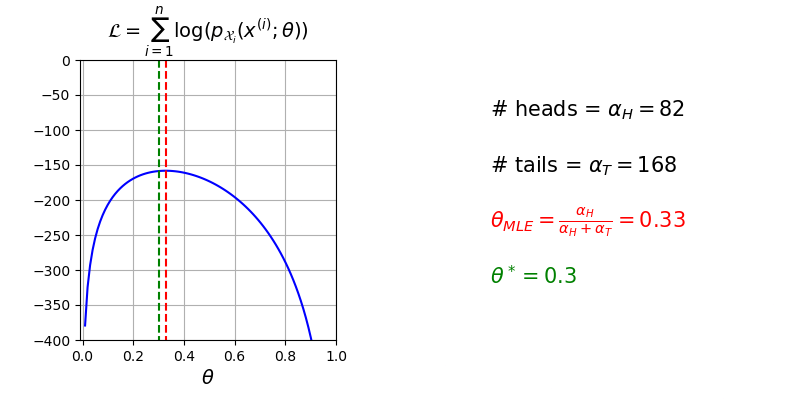

interactive(children=(FloatSlider(value=0.5, description='$\\theta^*$', max=0.9, min=0.1), IntSlider(value=10,…

In [6]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.85, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample(theta, n, checkbox0, checkbox1):
    Exp = theta
    Var = theta * (1 - theta)
    Nb = 250
    np.random.seed(21)
    samples = np.random.binomial(size=Nb, n=1, p= theta)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel(r'$\theta$', fontsize=14)
    ax1.set_xlim(-0.01, 1)
    ax1.set_ylim(-400, 0)

    ax2.clear()
    ax2.set_axis_off()

    theta_rng = np.linspace(0.01, 0.99, 100)
    
    samples_n = samples[0:n]
    heads = sum(samples_n)
    tails = n - heads
    L = heads*np.log(theta_rng) + tails*np.log(1-theta_rng)
    
    ax1.plot(theta_rng, L, color="blue")
    if checkbox0 == 1:
        ax1.plot([heads/n,heads/n], [0,-500], color="r", ls='dashed')
    if checkbox1 == 1:
        ax1.plot([theta,theta], [0,-500], color="g", ls='dashed')
    title1 = (r"$\mathcal{L} = \sum_{i=1}^{n} \log (  p_{\mathcal{X}_i} (x^{(i)}; \theta))$")
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.1, 0.8, '# heads = ' 
             + r'$\alpha_H =$'
             + str(round(heads,2)),
             color = 'black', fontsize = 15)
    ax2.text(0.1, 0.6, '# tails = '
             + r'$\alpha_T =$'
             + str(round(tails,2)),
             color = 'black', fontsize = 15)
    ax2.text(0.1, 0.4, r'$\theta_{MLE} = $'
             + r'$\frac{\alpha_H}{\alpha_H + \alpha_T} =$'
             + str(round(heads/n,2)),
             color = 'r', fontsize = 15)
    ax2.text(0.1, 0.2, r'$\theta^* = $'
             + str(round(theta,2)),
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_BinSample, 
                    theta = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    n = widgets.IntSlider(value=10, min=10, max=250, step=1),
                    checkbox0 = widgets.Checkbox(description = r'Plot $\theta_{MLE}$', value=False),
                    checkbox1 = widgets.Checkbox(description = r'Plot true value of $\theta$', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try changing the values of $n$ and $\theta^*$. What do you notice as $n$ gets large, is the same behaviour manifest for all values of $\theta^*$?
    
2. Can you explain this behaviour using the sampling distribution and the standard error? 

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $n$ gets larger the likelihood becomes more sharply peaked, moreover the peak of the likelihood seems to get closer to the true value of $\theta$. 
   
    For $\theta^*$ very low or very high there seems to be more dviation between $\theta_{\mathsf{MLE}}$ and $\theta^*$.
    
2. From our work on the sampling distribution we know that an unbiased estimator of $\theta^*$ is given by:
    
   \begin{equation*}
    \mathbb{E}[\overline{\mathcal{X}}] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[\mathcal{X}^{(i)}]	= \mu	
    \end{equation*}
    
    And that the standard error of an estimate generated from such an estimator, is given by:

    \begin{equation*}
        \sigma_{\overline{\mathcal{X}}} =  \frac{\sigma}{\sqrt{n}}	
    \end{equation*}

    In this case the estimate is therefore given by $\theta_{\mathsf{MLE}}$ and the standard error by $\frac{\sqrt{\theta^* (1-\theta^*)}}{\sqrt{n}}$.

    Clearly the standard error will diminish as $\theta^*$ tends to $0.5$ and as $n$ grows large.
</div>

### _Ex: Height & Age_
Now let's seek to illustrate this with a continuous example, in which we measure the age and height of a sample of people. 

Here we assume that each observation is the outcome of an i.i.d. Multivariate Gaussian (MVG) random variable, $\boldsymbol{\mathcal{Y}}_i$: 

\begin{align}
	\boldsymbol{\mathcal{Y}}_i &\sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}) \\
\end{align}

In this case:

\begin{align*}
    L( \boldsymbol{\mu}, \boldsymbol{\Sigma} ) &= \prod_{i=1}^{n} p_{\boldsymbol{\mathcal{Y}}_i} (\mathbf{y}^{(i)} ; \boldsymbol{\mu}, \boldsymbol{\Sigma})	\\
    &= \frac{1}{(2 \pi)^{n}} \frac{1}{\vert \boldsymbol{\Sigma} \vert^{n/2}} \prod_{i=1}^n \exp \left( -\frac{1}{2}(\mathbf{y}^{(i)}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y}^{(i)}-\boldsymbol{\mu}) \right) \\
    \implies \mathcal{L}(\boldsymbol{\mu}, \boldsymbol{\Sigma}) &= -\frac{n}{2} \ln ( \vert \boldsymbol{\Sigma} \vert)  - \frac{1}{2}\sum_{i=1}^n (\mathbf{y}^{(i)}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y}^{(i)}-\boldsymbol{\mu}) + \text{const.}
\end{align*}

And:

\begin{align*}
    \boldsymbol{\mu}_{\mathsf{MLE}} &= \mbox{argmax}_{\boldsymbol{\mu}}  \mathcal{L}(\boldsymbol{\mu}, \boldsymbol{\Sigma}) \\
    &= \frac{\sum_{i=1}^n \boldsymbol{y}^{(i)}}{n}
\end{align*}

And:

\begin{align*}
    \boldsymbol{\Sigma}_{\mathsf{MLE}} &= \mbox{argmax}_{\boldsymbol{\Sigma}}  \mathcal{L}(\boldsymbol{\mu}, \boldsymbol{\Sigma})  \\
    &= \frac{1}{n}\sum_{i=1}^n (\mathbf{y}^{(i)}-\boldsymbol{\mu}) (\mathbf{y}^{(i)}-\boldsymbol{\mu})^{T}
\end{align*}

But let's fix $\boldsymbol{\Sigma}$, so that:

\begin{align*}
		\boldsymbol{\Sigma} &
  		&=\begin{bmatrix}
		0.5^2 & 0.6 \times 0.5 \times 20\\
		0.6 \times 0.5 \times 20 & 20^2
   		\end{bmatrix}
	\end{align*}
    
And now we only need learn the MLE for $\boldsymbol{\mu}$:

<IPython.core.display.Javascript object>


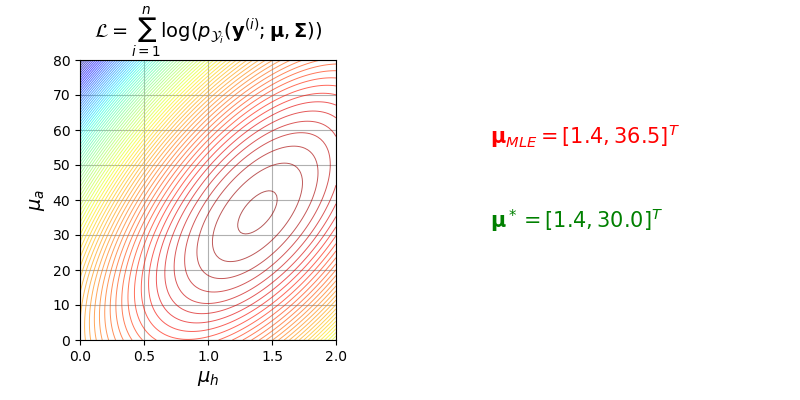

interactive(children=(FloatSlider(value=1.4, description='$\\mu_h^{*}$', max=2.0, min=0.4), FloatSlider(value=…

In [5]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.85, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_MVGSample(mu_h, mu_a, n, checkbox0, checkbox1):
    sigma_h = 0.5
    sigma_a = 20.0
    rho = 0.6

    mu = [mu_h, mu_a]
    sigma = [ [sigma_h**2, rho*sigma_h*sigma_a], [rho*sigma_h*sigma_a , sigma_a**2] ]
    sigma_inv = np.linalg.inv(sigma)
    Nb = 250
    np.random.seed(21)
    samples = np.random.multivariate_normal(mu, sigma, size=Nb)
    
    samples_n = samples[0:n]
    mu_MLE = sum(samples_n)/n
    mu_h_MLE = mu_MLE[0]
    mu_a_MLE = mu_MLE[1]
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$\mu_h$', fontsize=14)
    ax1.set_ylabel('$\mu_a$', fontsize=14)
    ax1.set_xlim(0, 2)
    ax1.set_ylim(0, 80)

    ax2.clear()
    ax2.set_axis_off()

    def L(mu_h, mu_a):
        l1 = -(n/2)*np.log(np.linalg.det(sigma))
        l2 = 0
        for i in range(n):
            l2 =  l2 + sigma_inv[0][0]*( (samples[i][0]-mu_h)**2 ) + sigma_inv[1][1]*( (samples[i][1]-mu_a)**2 ) + 2*sigma_inv[0][1]*(samples[i][0]-mu_h)*(samples[i][1]-mu_a) 
        return l1 - 0.5*l2

    x_line = np.linspace(0, 2, 100)
    y_line = np.linspace(0, 80, 100)
    x, y = np.meshgrid(x_line, y_line)
    z = L(x, y)
    ax1.contour(x, y, z, 100, cmap=plt.cm.jet, linewidths=0.7, alpha=0.65)
    
    if checkbox0 == 1:
        ax1.plot([mu_h_MLE], [mu_a_MLE], color="r", marker="+")
    if checkbox1 == 1:
        ax1.plot([mu_h], [mu_a], color="g", marker="x")
    title1 = ("$\mathcal{L} = \sum_{i=1}^{n} \log (  p_{\mathbf{\mathcal{Y}}_i} (\mathbf{y}^{(i)} ; \mathbf{\mu}, \mathbf{\Sigma}))$")
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.1, 0.7, "$\mathbf{\mu}_{MLE} = [$" 
          + str(round(mu_h_MLE,1)) 
          +"$,$"
          + str(round(mu_a_MLE,1)) 
          +"$]^T$", 
             color = 'r', fontsize = 15)
    ax2.text(0.1, 0.4, "$\mathbf{\mu}^* = [$" 
          + str(round(mu_h,1)) 
          +"$,$"
          + str(round(mu_a,1)) 
          +"$]^T$", 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_MVGSample, 
                    mu_h = widgets.FloatSlider(value=1.4, min=0.4, max=2, step=0.1, 
                                                description = '$\mu_h^{*}$'),
                    mu_a = widgets.FloatSlider(value=30, min=20, max=40, step=1, 
                                                description = '$\mu_a^{*}$'),
                    n = widgets.IntSlider(value=10, min=10, max=250, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'${\boldsymbol{\mu}}_{MLE}$', 
                                                 value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot true value of ' + r'${\boldsymbol{\mu}}$', 
                                                 value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try changing the values of $n$ and $\boldsymbol{\mu}^*$. What do you notice as $n$ gets large, is the same behaviour manifest for all values of $\boldsymbol{\mu}^*$? 
    
2. Does this behaviour change if you change $\boldsymbol{\Sigma}$?

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $n$ gets large, $\boldsymbol{\mu}_{\mathsf{MLE}} \rightarrow \boldsymbol{\mu}^*$. The same behaviour is manifest for all values of $\boldsymbol{\mu}^*$. 
    
2. As the variances within $\boldsymbol{\Sigma}$ increase (i.e. as the variability of the distribution becomes larger) then $\boldsymbol{\mu}_{\mathsf{MLE}}$ tends to deviate more from $\boldsymbol{\mu}^*$

</div>

For a full explanantion of the behaviour observed in these two examples it would, be helpful if we were able to somehow quantify our **confidence** in our estimate, for this we need to consider the **sampling distribution** of the MLE.

There are several different approaches to this - we will examine three methods: **Large Sample Theory**, the **Bootstrap**, and **PAC Learning Theory**.

<a id='section_LST'></a>
## 1.b. MLE Confidence: Large Sample Theory 

We seek to use large sample theory to develop the large sample distribution of a maximum likelihood estimate, once we have an approximation to this distribution we can use it to express our measure of confidence in the MLE.

In what follows we will assume that data is i.i.d., and under certain conditions, as the sample size tends to infinity, the sampling distribution of the MLE becomes Gaussian:
as $n \rightarrow \infty$, then the sampling distribution will tend to:

\begin{equation*}
    {\boldsymbol{\theta}}_{\mathsf{MLE}} \sim \mathcal{N} \left(\boldsymbol{\theta}^*, \left(n \mathbf{I}(\boldsymbol{\theta}^*)\right)^{-1}\right)	
\end{equation*}

Here $\mathbf{I}(\widetilde{\boldsymbol{\theta}})$ is the **Fisher Information matrix**, a measure of the curvature around the peak of the likelihood, defined as:

\begin{equation*}
    \mathbf{I}(\widetilde{\boldsymbol{\theta}}) = \mathbb{E}_{\mathcal{D}({\boldsymbol{\theta}^*)}} [-\nabla_{\boldsymbol{\theta}}^2 \log (p_{ \mathcal{X}} (x ; \boldsymbol{\theta})	 \vert_{\widetilde{\boldsymbol{\theta}}} ]	
\end{equation*}

Here $\mathcal{D}({\boldsymbol{\theta}}^*)$ signifies that we are taking the expectation with respect to a probability distribution characterised by the true parameter, ${\boldsymbol{\theta}}^*$ 

$\qquad$ 

<div class=note>
<b>Aside:</b>

From the <b>Affine Transformation</b> property of the MVG we know that:

If $\mathbf{x} = \boldsymbol{\mu} + \mathbf{B}\mathbf{z}$, where $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$ and $\boldsymbol{\mu}$, $\mathbf{B}$ are collections of constants, then:
\begin{equation}
    \mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}, \mathbf{B}\mathbf{B}^T)
\end{equation}

We note further that, since $\mathbf{B}\mathbf{B}^T$ must be positive definite, then we can express it via its eigendecomposition as follows:

\begin{equation}
    \mathbf{B}\mathbf{B}^T = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}^T
\end{equation}

Where $\boldsymbol{\Lambda}$ is the diagonal matrix of the eigenvalues of $\mathbf{B}\mathbf{B}^T$ and $\mathbf{Q}$ is the matrix of the ordered eigenvectors.

Thus:
    
\begin{equation}
    \mathbf{B}=\mathbf{Q} \boldsymbol{\Lambda}^{1/2} \qquad \mbox{and} \qquad \mathbf{B}^{-1}= \boldsymbol{\Lambda}^{-1/2}\mathbf{Q}^T
\end{equation}

From this it follows that:

\begin{align}
    \mathbf{x} &\sim \mathcal{N}(\boldsymbol{\mu}, \mathbf{B}\mathbf{B}^T) \\
    \implies \mathbf{B} (\mathbf{x} - \boldsymbol{\mu}) &\sim \mathcal{N}(0, \mathbf{I}) \\
    \implies \boldsymbol{\Lambda}^{-1/2}\mathbf{Q}^T (\mathbf{x} - \boldsymbol{\mu}) &\sim \mathcal{N}(0, \mathbf{I})
\end{align}
</div>

$\qquad$ 

Thus:

\begin{align}
    {\boldsymbol{\theta}}_{\mathsf{MLE}} &\sim \mathcal{N} \left(\boldsymbol{\theta}^*, \left(n \mathbf{I}(\boldsymbol{\theta}^*)\right)^{-1}\right) \\
    \implies \boldsymbol{\Lambda}^{-1/2}\mathbf{Q}^T ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*) &\sim \mathcal{N}(0, \mathbf{I})
\end{align}

Where:

* The eigendecomposition of $\left(n \mathbf{I}(\boldsymbol{\theta}^*)\right)^{-1}$ is given by $\mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}^T$.

* $\boldsymbol{\Lambda}$ is the diagonal matrix of the ordered eigenvalues of $\left(n \mathbf{I}(\boldsymbol{\theta}^*)\right)^{-1}$

* $\mathbf{Q}$ is the matrix of the ordered eigenvectors of $\left(n \mathbf{I}(\boldsymbol{\theta}^*)\right)^{-1}$

### Confidence Regions & Confidence Intervals

We can use this distribution to build a **confidence region** for $\boldsymbol{\theta}^*$. A confidence region is a region based on the sample values used to estimate $\boldsymbol{\theta}^*$. Since the sample values are random then the interval itself is random and the probability that it contains $\boldsymbol{\theta}^*$ is called the **coverage probability** of the region. It quantifies the uncertainty of the parameter estimate. 

\begin{equation*}
    \mathbb{P}_{\mathcal{D}^n} \left[ 
    \boldsymbol{\Lambda}^{-1/2}\mathbf{Q}^T ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*)
    \in S_{\delta}
    \right] = 1 - \delta	
\end{equation*}

Here $S_{\delta}$ is a hyper-sphere centred at zero, with a radius such that:

\begin{equation}
    \frac{1}{(2 \pi)^{k/2}} \int_{S_{\delta}} \exp \left( -\frac{1}{2} \mathbf{x}^T \mathbf{x} \right) d \mathbf{x} = 1 - \delta
\end{equation}

#### <u>Confidence Region in 2-dimensions</u>

In particular, if $k=2$:

\begin{align}
    \frac{1}{(2 \pi)^{k/2}} \int_{S_{\delta}} \exp \left( -\frac{1}{2} \mathbf{x}^T \mathbf{x} \right) d \mathbf{x} 
    &= \frac{1}{(2 \pi)} \int_{S_{\delta}} \exp -\frac{1}{2}\left( x_1^{2} + x_2^{2} \right) dx_1 dx_2 \\
    &= \frac{1}{(2 \pi)} \int_{0}^{R} \int_{0}^{2\pi} \exp \left( -\frac{1}{2} r^{2} \right) r dr d \phi \\
    &= \int_{0}^{R} \exp \left(- \frac{1}{2} r^{2} \right) r dr \\
    &= \int_{0}^{\frac{1}{2}R^2} \exp \left( -u \right) du \\
    &= 1 - \exp\left(-\frac{1}{2}R^2\right) \\
    &= 1 - \delta \\
    \implies \delta &= \exp\left(-\frac{1}{2}R^2\right) \\
    R^2 &= 2 \ln \left( \frac{1}{\delta}\right)
\end{align}

Where the second line follows from a use of circular polar coordinates, while the third line follows from the substitution $u=\frac{1}{2}r^2$.

In other words the $(1- \delta)$ confidence region for $\boldsymbol{\theta}^*$ is characterised by:

\begin{align}
    \mathbb{P}_{\mathcal{D}^n} \left[ ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*)
    \in E_{\delta}
    \right] = 1 - \delta	\label{eq1}\tag{1}
\end{align}

Here $E_{\delta}$ is a region characterised by $\boldsymbol{\theta}$ that satisfy:

\begin{align}
    \Vert \boldsymbol{\Lambda}^{-1/2}\mathbf{Q}^T ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}) \Vert^2 &\leq 2 \ln \left( \frac{1}{\delta}\right) \\
    \implies ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta})^T \mathbf{Q}\boldsymbol{\Lambda}^{-1}\mathbf{Q}^T ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}) &\leq 2 \ln \left( \frac{1}{\delta}\right) \\
    \implies ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta})^T 
    n \mathbf{I}(\boldsymbol{\theta})
    ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}) &\leq 2 \ln \left( \frac{1}{\delta}\right) \\
    \implies ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta})^T 
    \mathbf{I}(\boldsymbol{\theta})
    ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}) &\leq \frac{2}{n} \ln \left( \frac{1}{\delta}\right) \\
\end{align}

And this, we recall from our work on the geometry of positive definite quadratic forms, characterises a region bounded by an **ellipse**.

#### <u>Confidence Interval in 1-dimension</u>

Now let's specialise to one dimensional $\boldsymbol{\theta} = \theta$, from which it follows by analogy that:

\begin{equation*}
    \sqrt{n \mathbf{I}(\theta^*)} ( {\theta}_{\mathsf{MLE}} - {\theta^*} )  \sim \mathcal{N} \left(0,1\right)	
\end{equation*}


We can use this distribution to build a **confidence interval** for $\theta^*$. A confidence interval is an interval based on the sample values used to estimate $\theta^*$. Since the sample values are random then the interval itself is random and the probability that it contains $\theta^*$ is called the coverage probability of the interval. It quantifies the uncertainty of the parameter estimate. 
We observe that:

\begin{equation*}
    \mathbb{P}_{\mathcal{D}^n} \left[ 
    z(\delta/2) \leq 
    \sqrt{n \mathbf{I}(\theta^*)} (\theta_{\mathsf{MLE}} - \theta^*) 
    \leq -z(\delta/2) 
    \right] = 1 - \delta	
\end{equation*}

Here $z(a)$ is the inverse cdf of the standard normal distributon, evaluated at the point $a$.

In other words the $(1- \delta)$ confidence interval for $\theta^*$ is characterised by:

\begin{equation*}
    \mathbb{P}_{\mathcal{D}^n} \left[ 
    \theta_{\mathsf{MLE}}+z(\delta/2) \frac{1}{\sqrt{n \mathbf{I}(\theta^*)}} \leq 
      \theta^* 
    \leq \theta_{\mathsf{MLE}} - z(\delta/2) \frac{1}{\sqrt{n \mathbf{I}(\theta^*)}} 
    \right] = 1 - \delta	
\end{equation*}

From which we see that the $(1 - \delta)$ confidence interval for $\theta^*$ is:

\begin{equation*}
    \theta_{\mathsf{MLE}} \pm z(\delta/2) \frac{1}{\sqrt{n \mathbf{I}(\theta^*)}}
\end{equation*}

Since $\theta^*$ is usually unknown, we approximate $\mathbf{I}(\theta^*)$ by $\mathbf{I}(\theta_{\mathsf{MLE}})$. 


#### <u>Interpretation</u>

Remember that in this, the frequentist, paradigm, the true parameter, $\theta^*$ (or $\boldsymbol{\theta}^*$), is fixed but unknown, while the interval (or region) is random. 

To repeat, the randomness that the probability which our formulations of confidence rest upon is associated with the confidence interval (or region) and **not** with the true parameter. 

Thus the interpretation of the confidence interval (region) is to say that $(1 - \delta)$ of (future) intervals (regions) generated for different random samples of size $n$ will contain the true parameter, but **not** that with probability $(1-\delta)$ the true parameter is contained in the **particular** confidence interval (region) which we have generated.

### _Ex: Coin Flips_

Let's return to our coin flips example to illustrate this. 

In this case:

\begin{align*}
    \mathbf{I}(\theta_{\mathsf{MLE}}) &= \mathbb{E}_{\mathcal{D}({\theta^*)}}  \left[-\nabla_{\theta}^2 \log (p_{ \mathcal{X}} (x ; \theta)	 \vert_{\theta_{\mathsf{MLE}}} \right]	\\
    &= \mathbb{E}_{\mathcal{D}({\theta^*)}}  \left[-\nabla_{\theta}^2 \log \left(\theta^{\mathbb{I}[x=1]} \times (1-\theta)^{\mathbb{I}[x=0]}\right)	 \Big\vert_{\theta_{\mathsf{MLE}}} \right]	\\
    &= \mathbb{E}_{\mathcal{D}({\theta^*)}}  \left[-\nabla_{\theta} \left(\frac{\mathbb{I}[x=1]}{\theta } - \frac{\mathbb{I}[x=0]}{(1-\theta) }	 \right)\Big\vert_{\theta_{\mathsf{MLE}}} \right]	\\
    &= \mathbb{E}_{\mathcal{D}({\theta^*)}}  \left[ \frac{\mathbb{I}[x=1]}{\theta_{\mathsf{MLE}}^2 } + \frac{\mathbb{I}[x=0]}{(1-\theta_{\mathsf{MLE}})^2 } \right]	\\
    & = \frac{\theta^{*}}{\theta_{\mathsf{MLE}}^2} + \frac{(1-\theta^{*})}{(1-\theta_{\mathsf{MLE}})^2}\\
    & = \frac{1}{\theta_{\mathsf{MLE}}} + \frac{1}{(1-\theta_{\mathsf{MLE}})}\\
    & = \frac{1}{\theta_{\mathsf{MLE}}(1-\theta_{\mathsf{MLE}})}
\end{align*}

Where we approximate the unknown value of $\theta^*$ in the second last line by $\theta_{\mathsf{MLE}}$.

From this we can generate a $(1 - \delta)$ confidence interval for $\theta^*$ as:

\begin{equation*}
    \theta_{\mathsf{MLE}} \pm z(\delta/2) \sqrt{ \frac{\theta_{\mathsf{MLE}}(1-\theta_{\mathsf{MLE}})}{n}}
\end{equation*}


<IPython.core.display.Javascript object>


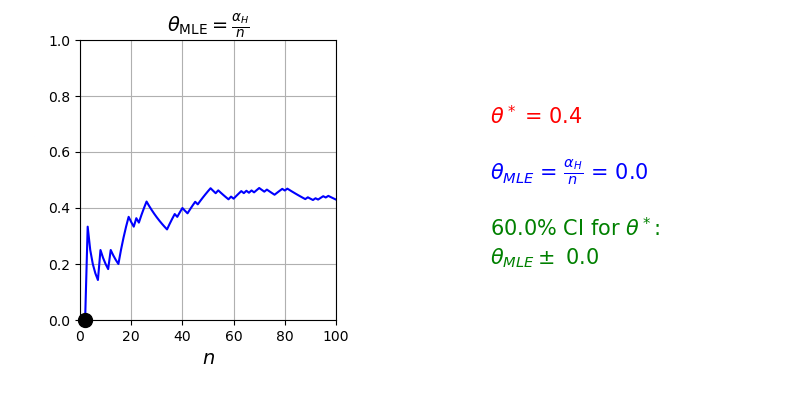

interactive(children=(FloatSlider(value=0.4, description='$\\theta^*$', max=0.9, min=0.1), FloatSlider(value=0…

In [6]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample_LST(theta, delta, n, checkbox0, checkbox1):
    Nb = 100
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$n$', fontsize=14)
    ax1.set_xlim(0, Nb)
    ax1.set_ylim(0, 1)

    ax2.clear()
    ax2.set_axis_off()

    x = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    lower_bnd = np.zeros(Nb)
    upper_bnd = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        theta_MLE[i] = sum(samples[0:i+1])/(i+1)
        lower_bnd[i] = theta_MLE[i] + norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )
        upper_bnd[i] = theta_MLE[i] - norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )

    ax1.plot(x, theta_MLE, color="blue")
    if checkbox0 == 1:
        ax1.plot([0,Nb], [theta,theta], color="r", ls='dashed')
    if checkbox1 == 1:
        ax1.plot(x, upper_bnd, color="g", ls='dashed')
        ax1.plot(x, lower_bnd, color="g", ls='dashed')
        ax1.fill_between(x, upper_bnd, lower_bnd, 
                     alpha=0.2, facecolor = 'g', edgecolor = 'green')
    ax1.plot([x[n-1]], [theta_MLE[n-1]], marker="o", markersize=10, 
                       markeredgecolor="black", markerfacecolor="black", clip_on=False)

    title1 = r'$\theta_{\mathsf{MLE}} = \frac{\alpha_{H}}{n}$'
    ax1.set_title(title1, fontsize=14)

    theta_mle = sum(samples[0:n])/n
    ci = -norm.ppf(delta/2) * np.sqrt( theta_mle * (1 - theta_mle) / n )
    
    ax2.text(0.1, 0.7, r'$\theta^*$ = '
             + str(round(theta,1)),
             color = 'r', fontsize = 15)
    ax2.text(0.1, 0.5, r'$\theta_{MLE}$ = '
             + r'$\frac{\alpha_H}{n}$ = '   
             + str(round(sum(samples[0:n])/(n),2)), 
             color = 'b', fontsize = 15)
    ax2.text(0.1, 0.3, str(round(100*(1-delta),0))
             + '% CI for '
             + r'$\theta^*$:', 
             color = 'g', fontsize = 15)
    ax2.text(0.1, 0.2, r'$\theta_{MLE} \pm$ '
             + str(round(ci,3)),
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_BinSample_LST, 
                    theta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta^*$', value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot Confidence Interval', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try varying $\delta$ and observe how the confidence interval varies with $n$.
    
2. What do you notice about the MLE estimate and its confidence interval for very small $n$? This is an example of one of the so-called **pathologies** of frequentist statistics.

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $\delta$ increases the confidence interval diminishes - in other words as the coverage probability of the interval decreases then the interval itself also diminishes. On the other hand as $n$ increases then, for a given coverage probability, we are able to discern a tighter interval.
    
2. For very small $n$ both the MLE estimate and the confidence interval go to zero. Maximum likelihood tells us that with very high confidence ${\theta}_{\mathsf{MLE}} = {\theta^*}$, but of course this is the case because, with very few examples in our data set, no tails have yet been encountered. Black swans, however, are lurking...

</div>

### _Ex: Height & Age_

Now let's return to our bivariate height and age example to illustrate what a 2-dimensional confidence might look like. 

In this case:

\begin{align*}
    \mathbf{I}({\boldsymbol{\mu}}_{\mathsf{MLE}}) &= \mathbb{E}_{\mathcal{D}({{\boldsymbol{\mu}}^*)}}  \left[-\nabla_{{\boldsymbol{\mu}}}^2 \log (p_{\boldsymbol{\mathcal{Y}}_i} (\mathbf{y}^{(i)} ; \boldsymbol{\mu}, \boldsymbol{\Sigma}))	 \vert_{{\boldsymbol{\mu}}_{\mathsf{MLE}}} \right]	\\
    &= \mathbb{E}_{\mathcal{D}({{\boldsymbol{\mu}}*)}}  \left[-\nabla_{{\boldsymbol{\mu}}}^2 \log \left( \frac{1}{2 \pi \vert \Sigma \vert ^{\frac{1}{2}}} \exp \left( -  \frac{1}{2}(\mathbf{y}-{\boldsymbol{\mu}} )^T  \boldsymbol{\Sigma}^{-1} (\mathbf{y}-{\boldsymbol{\mu}} )\right)  \right)	 \Bigg\vert_{{\boldsymbol{\mu}}_{\mathsf{MLE}}} \right]	\\
    &= \mathbb{E}_{\mathcal{D}({{\boldsymbol{\mu}}*)}}  \left[ \boldsymbol{\Sigma}^{-1} \right]	\\
    &= \boldsymbol{\Sigma}^{-1}
\end{align*}

From this we generate the $(1- \delta)$ confidence region for $\boldsymbol{\mu}^*$ as the interior bounded by values of ${\boldsymbol{\mu}}$ that satisfy the following ellipse:

\begin{align}
({\boldsymbol{\mu}} - \boldsymbol{\mu}_{\mathsf{MLE}})^T 
    \boldsymbol{\Sigma}^{-1}
    (\boldsymbol{\mu} - \boldsymbol{\mu}_{\mathsf{MLE}}) = \frac{2}{n} \ln \left( \frac{1}{\delta}\right) \\
\end{align}

<IPython.core.display.Javascript object>


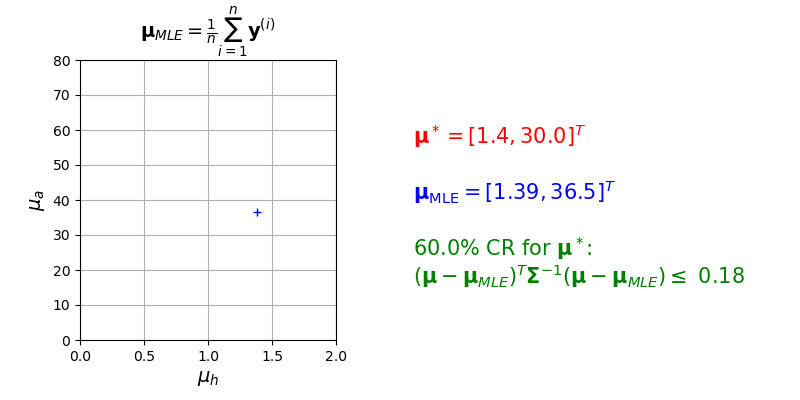

interactive(children=(FloatSlider(value=1.4, description='$\\mu_h^*$', max=2.0, min=0.4), FloatSlider(value=30…

In [7]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.85, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_MVGSample_LST(mu_h, mu_a, n, delta, checkbox0, checkbox1):
    sigma_h = 0.5
    sigma_a = 20.0
    rho = 0.6

    mu = [mu_h, mu_a]
    sigma = [ [sigma_h**2, rho*sigma_h*sigma_a], [rho*sigma_h*sigma_a , sigma_a**2] ]
    sigma_inv = np.linalg.inv(sigma)
    Nb = 250
    np.random.seed(21)
    samples = np.random.multivariate_normal(mu, sigma, size=Nb)
    
    samples_n = samples[0:n]
    mu_MLE = sum(samples_n)/n
    mu_h_MLE = mu_MLE[0]
    mu_a_MLE = mu_MLE[1]
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$\mu_h$', fontsize=14)
    ax1.set_ylabel('$\mu_a$', fontsize=14)
    ax1.set_xlim(0, 2)
    ax1.set_ylim(0, 80)

    ax2.clear()
    ax2.set_axis_off()

    def conf_region(mu_h, mu_a, delta):
        mu = [mu_h, mu_a]
        mu_MLE = sum(samples_n)/n
        quad = sigma_inv[0][0]*( (mu_h_MLE-mu_h)**2 ) + sigma_inv[1][1]*( (mu_a_MLE-mu_a)**2 ) + 2*sigma_inv[0][1]*(mu_h_MLE-mu_h)*(mu_a_MLE-mu_a) 
        radius = (2/n)*np.log(1/delta)
        indic = (quad-radius)
        indic[(quad-radius)>0] = 0
        indic[(quad-radius)<=0] = 1
        return indic

    x_line = np.linspace(0, 2, 500)
    y_line = np.linspace(0, 80, 500)
    x, y = np.meshgrid(x_line, y_line)
    z = conf_region(x, y, delta)

    ax1.plot([mu_h_MLE], [mu_a_MLE], color="blue", marker="+")

    if checkbox1 == 1:
        ax1.contourf(x, y, z, 1, colors=['white','green'], alpha=0.35)
        ax1.contour(x, y, z, 1, colors=['green'])
    if checkbox0 == 1:
        ax1.plot([mu_h], [mu_a], color="red", marker="x")
    title1 = (r'$\mathbf{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^n \mathbf{y}^{(i)}$'
             )
    ax1.set_title(title1, fontsize=14)

    ax2.text(-0.2, 0.7, "$\mathbf{\mu}^* = [$" 
          + str(round(mu_h,2)) 
          +"$,$"
          + str(round(mu_a,1)) 
          +"$]^T$", 
             color = 'red', fontsize = 15)
    ax2.text(-0.2, 0.5, "$\mathbf{\mu}_{\mathsf{MLE}} = [$" 
          + str(round(mu_h_MLE,2)) 
          +"$,$"
          + str(round(mu_a_MLE,1)) 
          +"$]^T$", 
             color = 'blue', fontsize = 15)
    ax2.text(-0.2, 0.3, str(round(100*(1-delta),0))
             + '% CR for '
             + r'$\mathbf{\mu}^*$:', 
             color = 'g', fontsize = 15)
    ax2.text(-0.2, 0.2, 
             r'$({\mathbf{\mu}} - \mathbf{\mu}_{MLE})^T \mathbf{\Sigma}^{-1}(\mathbf{\mu} - \mathbf{\mu}_{MLE}) \leq $ '
             + str(round(-(2/n)*np.log(delta),2)),
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_MVGSample_LST, 
                    mu_h = widgets.FloatSlider(value=1.4, min=0.4, max=2, step=0.1, 
                                                description = '$\mu_h^*$'),
                    mu_a = widgets.FloatSlider(value=30, min=20, max=40, step=1, 
                                                description = '$\mu_a^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=10, min=10, max=250, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'${\boldsymbol{\mu}}^{*}$', 
                                                 value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot Confidence Region', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try varying $\delta$ and observe how the confidence region varies with $n$.
    
2. Now try changing the $\boldsymbol{\Sigma}$ matrix. It should now be clear why the behaviour which noticed in the earlier section for this example manifests itself.

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $\delta$ increases the confidence region diminishes - in other words as the coverage probability of the region decreases then the region itself also diminishes. On the other hand as $n$ increases then, for a given coverage probability, we are able to discern a tighter region.
    
2. Clearly as the variance of elements of $\boldsymbol{\Sigma}$ grows then the confidence region also increases.

</div>

<a id='section_Boostrap'></a>
## 1.c. MLE Confidence: The Bootstrap 

Now let's turn our attention to the (parametric) **Bootstrap** approach to building an approximation of the sampling distribution for the MLE - this can be useful if the estimator is a complex function of the true parameters. 

### Bootstrap Confidence Regions & Confidence Intervals

#### <u>Bootstrap Confidence Region in $k$-dimensions</u>

Recall that, based on an analagous definition to the characteristic expression given in (1), a $(1-\delta)$ confidence region, $C_\delta$, for $\boldsymbol{\theta}^*$, can be defined as:

\begin{equation}
    \mathbb{P}_{\mathcal{D}^n} \left[ ({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*)
    \in C_{\delta}
    \right] = 1 - \delta
\end{equation}

If we knew $\boldsymbol{\theta}^*$ then we could seek to generate $C_\delta$ by the following procedure: 
1. Generate many samples of $n$ using the probability distribution characterised by $\boldsymbol{\theta}^*$. 
2. For each sample, calculate the MLE of $\boldsymbol{\theta}$, calling the $j$-th such estimate ${{\boldsymbol{\theta}^*}_{\mathsf{MLE}}}^{(j)}$. 
3. Approximate the distribution of $({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*)$ empirically using the samples $({{\boldsymbol{\theta}^*}_{\mathsf{MLE}}}^{(j)} - \boldsymbol{\theta}^*)$. 
4. Extract a region, approximating $C_\delta$, over which the equivalent distribution integrates to $(1-\delta)$.

But since $\boldsymbol{\theta}^*$ is unknown, the bootstrap approach seeks to approximate it using our MLE estimate, $\boldsymbol{\theta}_{\mathsf{MLE}}$. Using this approximation, we then seek to generate $C_\delta$ by the following procedure: 
1. Generate $B$ **bootstrap samples** of $n$ using the probability distribution characterised by $\boldsymbol{\theta}_{\mathsf{MLE}}$. 
2. For each bootstrap sample, calculate the MLE of $\boldsymbol{\theta}$, calling the $j$-th such estimate ${{\boldsymbol{\theta}}_{\mathsf{MLE}}}^{(j)}$. 
3. Approximate the distribution of $({\boldsymbol{\theta}}_{\mathsf{MLE}} - \boldsymbol{\theta}^*)$ empirically using the samples $({{\boldsymbol{\theta}}_{\mathsf{MLE}}}^{(j)} - \boldsymbol{\theta}_{\mathsf{MLE}})$. 
4. Extract a bootstrap region, approximating $C_\delta$, over which the equivalent distribution integrates to $(1-\delta)$.

#### <u>Bootstrap Confidence Interval in 1-dimension</u>

Now let's specialise to one dimensional $\boldsymbol{\theta} = \theta$, then the $(1- \delta)$ confidence interval for $\theta^*$ is characterised by:

\begin{align*}
    \mathbb{P}_{\mathcal{D}^n} \left[ 
    q(\delta/2)  \leq 
      (\theta_{\mathsf{MLE}} - \theta^*) 
    \leq q(1-\delta/2)  
    \right] &= 1 - \delta	\\
\implies    \mathbb{P}_{\mathcal{D}^n} \left[ 
    \theta_{\mathsf{MLE}}-q(1-\delta/2)  \leq 
      \theta^* 
    \leq \theta_{\mathsf{MLE}} - q(\delta/2)  
    \right] &= 1 - \delta	
\end{align*}

Where $q(\delta/2)$ is the $\delta/2$ percentile of the distribution and $q(1 - \delta/2)$ is the $(1 - \delta/2)$ percentile of the distribution. 

### _Ex: Coin Flips_

Let's return once more to our coin flips example to illustrate the 1-dimensional setting: 

<IPython.core.display.Javascript object>


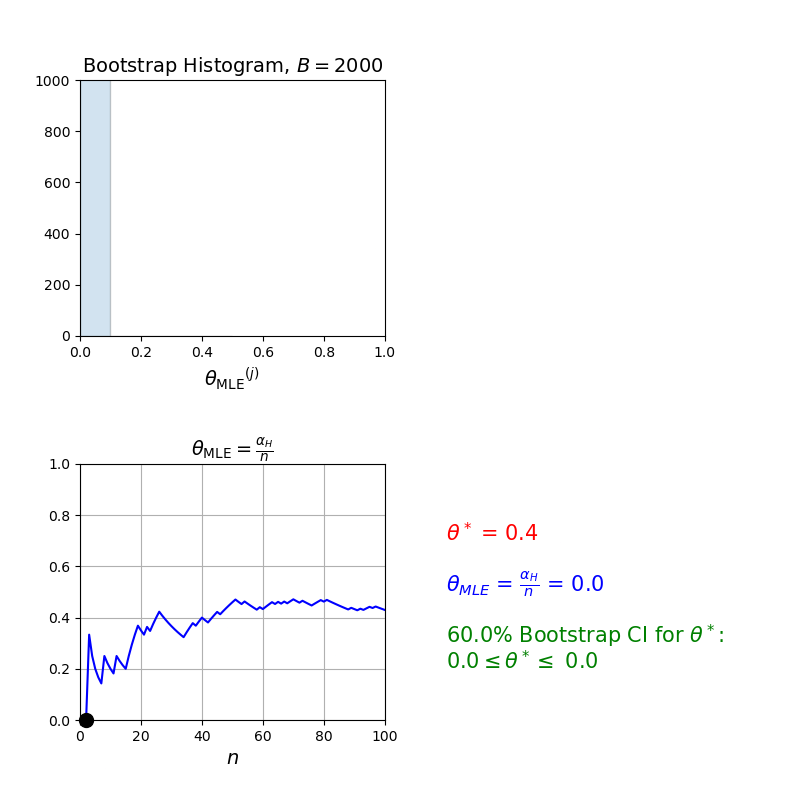

interactive(children=(FloatSlider(value=0.4, description='$\\theta^*$', max=0.9, min=0.1), FloatSlider(value=0…

In [8]:
plt.close('all')
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.5,
                    wspace=0.1)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

def bootstrap(Nb, B, theta_MLE, delta):
    theta_diff = np.zeros(B)
    for j in range(0, B):
        bs_samples  = np.random.binomial(n=1, p=theta_MLE, size=Nb)
        theta_MLE_j = sum(bs_samples)/Nb
        theta_diff[j]  = theta_MLE_j - theta_MLE
    q_l = np.quantile(theta_diff, delta/2)
    q_h = np.quantile(theta_diff, 1-delta/2)
    d = dict()
    d['theta_bs'] = theta_diff + theta_MLE
    d['q_l'] = q_l
    d['q_h'] = q_h
    return d

def plot_BinSample_Bootstrap(theta, delta, n, checkbox0, checkbox1):
    Nb = 100
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    B = 2000
    
    ax1.clear()
    ax1.set_xlabel(r'${{\theta}_{\mathsf{MLE}}}^{(j)}$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, B/2)

    ax2.clear()
    ax2.set_axis_off()
    
    ax3.clear()
    ax3.grid()
    ax3.set_xlabel('$n$', fontsize=14)
    ax3.set_xlim(0, Nb)
    ax3.set_ylim(0, 1)

    ax4.clear()
    ax4.set_axis_off()

    x = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    lower_bnd = np.zeros(Nb)
    upper_bnd = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        theta_MLE[i] = sum(samples[0:i+1])/(i+1)
        d = bootstrap(i+1, B, theta_MLE[i], delta)
        lower_bnd[i] = theta_MLE[i] - d['q_h']
        upper_bnd[i] = theta_MLE[i] - d['q_l']

    theta_mle = theta_MLE[n-1]
    lb = theta_MLE[n-1] - lower_bnd[n-1]
    ub = theta_MLE[n-1] - upper_bnd[n-1]

    d = bootstrap(n, B, theta_mle, delta)
    ax1.hist(d['theta_bs'],  alpha=0.2, edgecolor = "black")
    title1 = r'Bootstrap Histogram, $B = $' + str(round(B,0))
    ax1.set_title(title1, fontsize=14)
    
    ax3.plot(x, theta_MLE, color="blue")
    if checkbox0 == 1:
        ax1.plot([theta,theta], [0,B/2], color="r", ls='dashed')
        ax3.plot([0,Nb], [theta,theta], color="r", ls='dashed')
    if checkbox1 == 1:
        point3, = ax1.plot([theta_mle], [0], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b", clip_on=False)
        ax1.arrow(theta_mle, 0, ub, 0, head_width=30, head_length=0.03, linewidth=2, color='g', 
                  length_includes_head=True, clip_on=False)
        ax1.arrow(theta_mle, 0, lb, 0, head_width=30, head_length=0.03, linewidth=2, color='g', 
                  length_includes_head=True, clip_on=False)

        ax3.plot(x, upper_bnd, color="g", ls='dashed')
        ax3.plot(x, lower_bnd, color="g", ls='dashed')
        ax3.fill_between(x, upper_bnd, lower_bnd, 
                     alpha=0.2, facecolor = 'g', edgecolor = 'green')
    ax3.plot([x[n-1]], [theta_MLE[n-1]], marker="o", markersize=10, 
                       markeredgecolor="black", markerfacecolor="black", clip_on=False)

    title3 = r'$\theta_{\mathsf{MLE}} = \frac{\alpha_{H}}{n}$'
    ax3.set_title(title3, fontsize=14)
    
    ax4.text(0.1, 0.7, r'$\theta^*$ = '
             + str(round(theta,1)),
             color = 'r', fontsize = 15)
    ax4.text(0.1, 0.5, r'$\theta_{MLE}$ = '
             + r'$\frac{\alpha_H}{n}$ = '   
             + str(round(sum(samples[0:n])/(n),2)), 
             color = 'b', fontsize = 15)
    ax4.text(0.1, 0.3, str(round(100*(1-delta),0))
             + '% Bootstrap CI for '
             + r'$\theta^*$:', 
             color = 'g', fontsize = 15)
    ax4.text(0.1, 0.2, str(round(theta_mle - lb,2))
             + r'$ \leq \theta^* \leq $ '
             + str(round(theta_mle - ub,2))
             ,
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_BinSample_Bootstrap, 
                    theta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta^*$', value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot Bootstrap CI', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. As $n$ increases, what distribution does the Bootstrap Histogram start to resemble? Can you explain this?
    
2. Try varying $\delta$ and observe how the confidence region varies with $n$, as in the Large Sample Theory case.

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $n$ increases, the Bootstrap Histogram start to resemble a Normal distribution. In the context of the central limit theorem this makes sense: ${\theta}_\mathsf{MLE}$ is the mean of a set of identical random variable - as this mean is taken over a larger sample its sampling distribution will tend towards the normal distribution. 
    
2. As before As $\delta$ increases the confidence interval diminishes - in other words as the coverage probability of the interval decreases then the interval itself also diminishes. On the other hand as $n$ increases then, for a given coverage probability, we are able to discern a tighter interval. The exception is the pathological effect which manifests itself for small $n$ as in the LST case.

</div>

### _Ex: Height & Age_

This time we will not develop a 2-dimensional confidence region. Why? Because in order to generate the region we need to make some assumptions about the shape of the region then perform a numerical integration of the histogram over a variety of differently sized regions which will be associated with different settings of $\delta$. While this is possible, the exercise is a costly one which we will not perform here. 

<a id='section_PAC'></a>
## 1.d. MLE Confidence: PAC Learning

Instead of seking to quantify our confidence in our MLE by characterising the whole sampling distribution, we could instead seek to investigate a worst case bound on the tail of that distribution. As we will see, this can be valuable since it offers us an approach which avoids the large sample approximation (that we made in the Large Sample Theory case) and furthermore avoids the computational overhead of the boostrap case.

### PAC Bounds

We'll focus on the **Probably Approximately Correct (PAC)** approach to this analysis, in which we try to generate a probabilistic bound for some quantity of interest such that it is **approximately** known with high **probability**.

#### <u>PAC Bounds in 1-dimension</u>

The development of such bounds can sometime be involved, so, for illustrative purposes, we will focus on the limited setting in which the quantity of interest is scalar and bounded to be in the range $[0,1]$. This sort of bound will be useful in the Bernoulli coin flipping example and rests upon a use of **Hoeffding's Inequality**:

$\quad$ 

<div class=note>
    
Let $\mathcal{X}_1$, $\mathcal{X}_2$,..., $\mathcal{X}_i$,... be a sequence of independent random variables, such that each is bounded to be in the interval $[a_i, b_i]$, and let $\overline{\mathcal{X}}_n = \frac{1}{n} \sum_{i=1}^{n} \mathcal{X}_i$ be the empirical mean of these random variables. 

Then for any $\epsilon > 0$:

\begin{equation*}
		\mathbb{P}\left( \vert \overline{\mathcal{X}} - \mathbb{E}[\overline{\mathcal{X}}] \vert \geq \epsilon \right) \leq 2 \exp \left( -\frac{2 n^2 \epsilon^2}{\sum_{i=1}^{n} (b_i - a_i)^2}    \right)
\end{equation*}

</div>

$\quad$ 

Making the following substitutions:

\begin{align}
        \theta_{\mathsf{MLE}} &\leftarrow \overline{\mathcal{X}}_n \\
        \theta^* &\leftarrow \mathbb{E}[\overline{\mathcal{X}}] \\
        [0,1] &\leftarrow [a_i, b_i]
\end{align}
    
This allows us to write:

\begin{align}
		\mathbb{P}_{\mathcal{D}^n}\left( \vert \theta_{\mathsf{MLE}} - \theta^* \vert \geq \epsilon \right) &\leq 2 e^{- n \epsilon^2} = \delta \\
		\mathbb{P}_{\mathcal{D}^n}\left( \vert \theta_{\mathsf{MLE}} - \theta^* \vert < \epsilon \right) &\geq 1 - 2 e^{- n \epsilon^2} = 1 - \delta \\
		\mathbb{P}_{\mathcal{D}^n}\left( \theta_{\mathsf{MLE}} - \epsilon < \theta^* < \theta_{\mathsf{MLE}} + \epsilon \right) &\geq 1 - \delta
\end{align}

Where: $\epsilon = \sqrt{\frac{1}{n} \ln \left( \frac{2}{\delta} \right)}$


### _Ex: Coin Flips_

Let's return to our coin flips example to illustrate this:

<IPython.core.display.Javascript object>


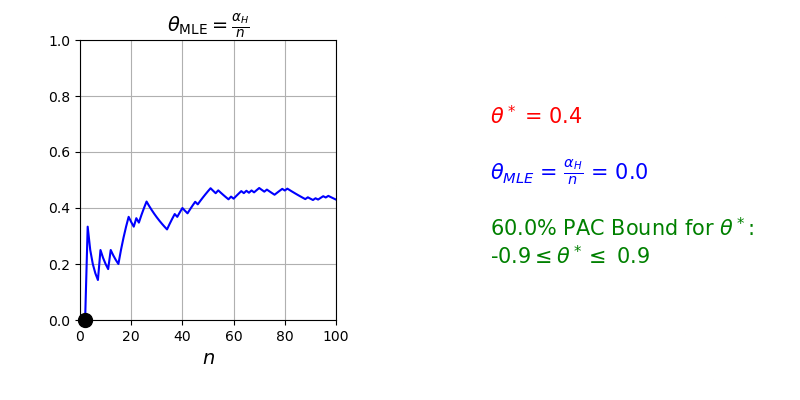

interactive(children=(FloatSlider(value=0.4, description='$\\theta^*$', max=0.9, min=0.1), FloatSlider(value=0…

In [9]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample_PAC(theta, delta, n, checkbox0, checkbox1):
    Nb = 100
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$n$', fontsize=14)
    ax1.set_xlim(0, Nb)
    ax1.set_ylim(0, 1)

    ax2.clear()
    ax2.set_axis_off()

    x = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    lower_bnd = np.zeros(Nb)
    upper_bnd = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        theta_MLE[i] = sum(samples[0:i+1])/(i+1)
        epsilon = np.sqrt( (1/x[i]) * np.log(2/delta) )
        lower_bnd[i] = theta_MLE[i] - epsilon
        upper_bnd[i] = theta_MLE[i] + epsilon

    ax1.plot(x, theta_MLE, color="blue")
    if checkbox0 == 1:
        ax1.plot([0,Nb], [theta,theta], color="r", ls='dashed')
    if checkbox1 == 1:
        ax1.plot(x, upper_bnd, color="g", ls='dashed')
        ax1.plot(x, lower_bnd, color="g", ls='dashed')
        ax1.fill_between(x, upper_bnd, lower_bnd, 
                     alpha=0.2, facecolor = 'g', edgecolor = 'green')
    ax1.plot([x[n-1]], [theta_MLE[n-1]], marker="o", markersize=10, 
                       markeredgecolor="black", markerfacecolor="black", clip_on=False)

    title1 = r'$\theta_{\mathsf{MLE}} = \frac{\alpha_{H}}{n}$'
    ax1.set_title(title1, fontsize=14)

    theta_mle = sum(samples[0:n])/n
    epsilon = np.sqrt( (1/n) * np.log(2/delta) )
    
    ax2.text(0.1, 0.7, r'$\theta^*$ = '
             + str(round(theta,1)),
             color = 'r', fontsize = 15)
    ax2.text(0.1, 0.5, r'$\theta_{MLE}$ = '
             + r'$\frac{\alpha_H}{n}$ = '   
             + str(round(sum(samples[0:n])/(n),2)), 
             color = 'b', fontsize = 15)
    ax2.text(0.1, 0.3, str(round(100*(1-delta),0))
             + '% PAC Bound for '
             + r'$\theta^*$:', 
             color = 'g', fontsize = 15)
    ax2.text(0.1, 0.2, str(round(theta_mle - epsilon,2))
             + r'$ \leq \theta^* \leq $ '
             + str(round(theta_mle + epsilon,2))
             ,
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_BinSample_PAC, 
                    theta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta^*$', value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot PAC Bound', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
Compare the interval derived from the PAC approach with that derived from the other two approaches. 
    
1. What do you notice in particular about the comparative behaviour of the interval for very small $n$?
2. What do you notice about the comparative size of the interval across all $n$?

</div>

<div class=answer>
<b>Answer:</b>
    
The interval derived from the PAC approach is consistently wider than that of the other two approaches. 
    
1. However, for very small $n$ the pathology we noted in other approaches seems to have disappeared - the PAC approach does not grow overly confident even in the absence of data.
2. Notice that the interval does respond to an increase in data and as $n$ increases so the PAC interval becomes tighter.

</div>

<a id='section_Comp'></a>
## 1.e. MLE Confidence: Comparison 

Let's close our study of the MLE by making a side by side comparison of the Large Sample Theory, the Bootstrap, and the PAC approached to measuring confidence, illustrated with the coin flipping example:

<IPython.core.display.Javascript object>


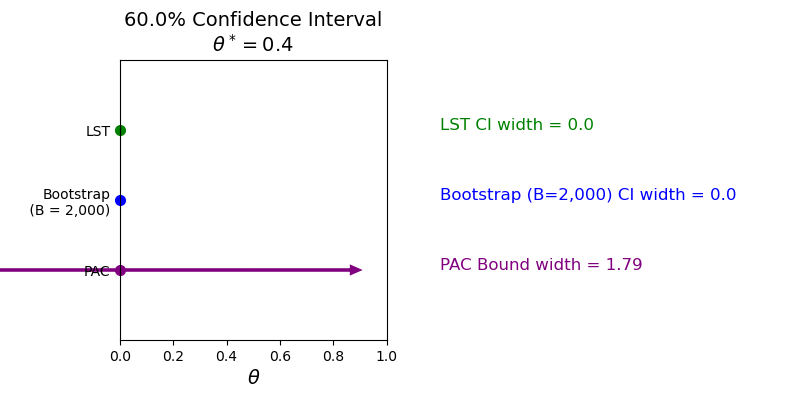

interactive(children=(FloatSlider(value=0.4, description='$\\theta^*$', max=0.9, min=0.1), FloatSlider(value=0…

In [10]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.85, 
                    hspace=0.5,
                    wspace=0.1)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample_All(theta, delta, n, checkbox0):
    Nb = 100
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    B = 2000
    
    ax1.clear()
    ax1.set_xlabel(r'${\theta}$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 4)
    my_yticks = ['PAC','Bootstrap\n (B = 2,000)','LST']
    ax1.set_yticks(np.array([1,2,3]), my_yticks)

    ax2.clear()
    ax2.set_axis_off()
    
    ax3.clear()
    ax3.grid()
    ax3.set_xlabel('$n$', fontsize=14)
    ax3.set_xlim(0, Nb)
    ax3.set_ylim(0, 1)

    ax4.clear()
    ax4.set_axis_off()

    x = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    lower_bnd_LST  = np.zeros(Nb)
    upper_bnd_LST  = np.zeros(Nb)
    lower_bnd_boot = np.zeros(Nb)
    upper_bnd_boot = np.zeros(Nb)
    lower_bnd_PAC  = np.zeros(Nb)
    upper_bnd_PAC  = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        theta_MLE[i] = sum(samples[0:i+1])/(i+1)
        # LST    
        lower_bnd_LST[i] = theta_MLE[i] + norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )
        upper_bnd_LST[i] = theta_MLE[i] - norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )
        # Bootstrap
        d = bootstrap(i+1, B, theta_MLE[i], delta)
        lower_bnd_boot[i] = theta_MLE[i] - d['q_h']
        upper_bnd_boot[i] = theta_MLE[i] - d['q_l']
        # PAC
        epsilon = np.sqrt( (1/x[i]) * np.log(2/delta) )
        lower_bnd_PAC[i] = theta_MLE[i] - epsilon
        upper_bnd_PAC[i] = theta_MLE[i] + epsilon    

    # Outputs for nb samples = n
    theta_mle = theta_MLE[n-1]
    # LST    
    lb_LST = theta_mle - lower_bnd_LST[n-1]
    ub_LST = upper_bnd_LST[n-1] - theta_mle
    # Bootstrap
    lb_boot = theta_mle - lower_bnd_boot[n-1]
    ub_boot = upper_bnd_boot[n-1] - theta_mle
    # PAC
    lb_PAC = theta_mle - lower_bnd_PAC[n-1]
    ub_PAC = upper_bnd_PAC[n-1] - theta_mle

    # Plot comparative intervals
    # LST    
    ax1.plot([theta_mle], [3], marker="o", markersize=7, markeredgecolor="g", markerfacecolor="g", clip_on=False)
    ax1.arrow(theta_mle, 3, ub_LST, 0, head_width=0.1, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 3, -lb_LST, 0, head_width=0.1, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    # Bootstrap    
    ax1.plot([theta_mle], [2], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b", clip_on=False)
    ax1.arrow(theta_mle, 2, ub_boot, 0, head_width=0.1, head_length=0.03, linewidth=2, color='b', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 2, -lb_boot, 0, head_width=0.1, head_length=0.03, linewidth=2, color='b', 
              length_includes_head=True, clip_on=False)
    # PAC    
    ax1.plot([theta_mle], [1], marker="o", markersize=7, markeredgecolor="purple", markerfacecolor="purple", clip_on=False)
    ax1.arrow(theta_mle, 1, ub_PAC, 0, head_width=0.1, head_length=0.03, linewidth=2, color='purple', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 1, -lb_PAC, 0, head_width=0.1, head_length=0.03, linewidth=2, color='purple', 
              length_includes_head=True, clip_on=False)
    title1 = str(round(100*(1-delta),0)) + '% Confidence Interval' + '\n' +r'$\theta^* = $' + str(round(theta,1))
    ax1.set_title(title1, fontsize=14)

    # Text output of comparative intervals
    ax2.text(0.1, 0.75, 'LST CI width = '
             + str(round(ub_LST + lb_LST,2)),
             color = 'g', fontsize = 12)
    ax2.text(0.1, 0.5, 'Bootstrap (B=2,000) CI width = '
             + str(round(ub_boot + lb_boot,2)),
             color = 'b', fontsize = 12)
    ax2.text(0.1, 0.25, 'PAC Bound width = '
             + str(round(ub_PAC + lb_PAC,2)),
             color = 'purple', fontsize = 12)
    
    # Plot Theta^*
    if checkbox0 == 1:
        ax1.plot([theta,theta], [0,4], color="r", ls='dashed')

    plt.show()
    
int_plot = interact(plot_BinSample_All, 
                    theta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta^*$', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
As in the last exercise compare the intervals with one another. 
    
1. Note how PAC behaves differently for very small $n$.
2. Note how LST and Bootstrap seem to converge as $n$ increases.

</div>

<a id='section_Bayes'></a>
## 2. Bayesian Setting

In the Bayesian setting the probability of an event is supposed to express a **degree of belief** in that event.

In this setting instead of regarding $\boldsymbol{\theta}$ as a quantity which is fixed but unknown, we instead regard it as a random variable, $\boldsymbol{\Theta}$ , with its own probability distribution, which we seek to update as we receive more data.

Statistics in this setting consist of making use of **Bayes' Theorem** to update degrees of belief after observing new data. 

Bayes' Theorem can be expressed as:

\begin{align}
    p_{\boldsymbol{\Theta}}(\boldsymbol{\theta} \vert \mathcal{S}) &=\frac{p_{\mathcal{X}}(\mathcal{S} \vert \boldsymbol{\theta}) p_{\boldsymbol{\Theta}}(\boldsymbol{\theta})}{p_{\mathcal{X}}(\mathcal{S})} \\
    &\propto p_{\mathcal{X}}(\mathcal{S} \vert \boldsymbol{\theta}) p_{\boldsymbol{\Theta}}(\boldsymbol{\theta})
\end{align}

* $p_{\boldsymbol{\Theta}}(\boldsymbol{\theta})$ is the **Prior Probability** distribution function, and represents a prior degree of belief about $\boldsymbol{\theta}$.

* $p_{\mathcal{X}}(\mathcal{S} \vert \boldsymbol{\theta})$ is the **Likelihood** of the data sequence, $\mathcal{S}$, which we have encountered already and denote by $L(\boldsymbol{\theta})$

* $p_{\mathcal{X}}(\mathcal{S})$ is the **Evidence**, a normalisation factor which is calculated as: $\int p_{\mathcal{X}}(\mathcal{S} \vert \widetilde{\boldsymbol{\theta}}) p_{\boldsymbol{\Theta}}(\widetilde{\boldsymbol{\theta}}) d\widetilde{\boldsymbol{\theta}}$

* $p_{\boldsymbol{\Theta}}(\boldsymbol{\theta} \vert \mathcal{S})$ is the **Posterior Probability** distribution function, and represents a degree of belief about $\boldsymbol{\theta}$, after observing $\mathcal{S}$.

Thus, the Bayesian update follows the following schematic:

\begin{equation}
    \mbox{Prior Distribution} \qquad \xrightarrow{\text{DATA}} \qquad \mbox{Posterior Distribution}
\end{equation}    

<a id='section_Priors'></a>
## 2.a. Prior Distribution

We have some experience in constructing the Likelihood, but how are we to select the Prior?

### Conjugate Priors

Often we would like to preserve a closed form solution for our posterior distribution. It runs out that certain forms of the Likelihood when combined with particular forms of the Prior, guarantee closed form representations for Posterior which share the same form as the Prior. If this is the case then we term the particular form of the Prior a **Conjugate Prior**.

Some examples:

- The Beta Distribution is the conjugate prior for the Binomial Likelihood.
    
    Recall from the lecture that in this case:

\begin{align}
    p_{\mathcal{X}}(\mathcal{S} \vert \theta) &\propto \theta^{\alpha_{H}} (1 - \theta)^{\alpha_{T}} \\
    \theta &\sim \mbox{Beta}(\beta_{H},\beta_{T}) \\
    \theta \vert \mathcal{S} &\sim \mbox{Beta}(\alpha_{H} + \beta_{H},\alpha_{T} + \beta_{T})
\end{align}


- The (Multivariate) Gaussian Distribution is the conjugate prior for the (Multivariate) Gaussian Likelihood where the covariance is known

    Recall from the lecture that in the bivariate case:

\begin{align}
    p_{\boldsymbol{\mathcal{X}}}(\mathcal{S} \vert \boldsymbol{\mu}; \boldsymbol{\Sigma}) &= \frac{1}{(2 \pi)^{n}} \frac{1}{\vert \boldsymbol{\Sigma} \vert^{n/2}} \prod_{i=1}^n \exp \left( -\frac{1}{2}(\mathbf{y}^{(i)}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y}^{(i)}-\boldsymbol{\mu}) \right) \\
    \boldsymbol{\mu} &\sim \mathcal{N}(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0) \\
    \boldsymbol{\mu} \vert \mathcal{S}  &\sim \mathcal{N}(\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n) 
\end{align}

Where:

$\boldsymbol{\mu}_n  = \left( {\boldsymbol{\Sigma}_{0}}^{-1} + n {\boldsymbol{\Sigma}}^{-1} \right)^{-1} \left(\boldsymbol{\Sigma}^{-1} n \overline{\mathbf{x}} + {\boldsymbol{\Sigma}_{0}}^{-1} \boldsymbol{\mu}_0 \right)$

And

$\boldsymbol{\Sigma}_n  = \left( {\boldsymbol{\Sigma}_{0}}^{-1} + n {\boldsymbol{\Sigma}}^{-1} \right)^{-1}$



We will see each of these examples in practice in a moment in our "Coin Flipping" and "Height & Age" illustrations.

### Uninformative Priors

Sometimes we wish to remain as agnostic as possible at the outset, and seek to "let the data speak for itself". One way of achieving this is to select a prior which is **uninformative** in some sense. There is some subtlety involved in the selection of uninformative priors, but for our purposes it will suffice to observe that, as an example, over a closed interval the uniform distribution can serve as such an agnostic prior distribution. Again, we will observe the effect of such a prior in practice in a moment in our "Coin Flipping" illistration.

<a id='section_BDT'></a>
## 2.b. Bayesian Decision Theory

Originally, at the beginning of this notebook, we had aimed to find $\theta$, but the Bayesian approach has yielded posterior distribution over $\theta$ instead - what are we to do this?

### Expected Utility Theory

Well, remember that ultimately we are seeking to make a decision about some matter under uncertainty, characterised stochastically. While we won't explore the matter in any detail, it turns out that what consititutes rational decision making under uncertainty is the domain of **expected utility theory** according to which the optimal decision is the one which minimises the expectation of some sort of loss function or equivalently maximises some sort of utility function.

#### Frequentist Setting

For example, if our utility function is characterised as the logarithm (according to some economists this is the most sensible utility function that allows individuals to maximise their wealth over the long term while avoiding any risk of ruin), and if we want to know how much to bet on the toss of a coin then we would seek to solve the following optimisation:

\begin{equation}
    b^* = \mbox{argmax}_b \mathbb{E}_{\mathcal{X}}\left[ \ln ( 1 + 2 b \mathbb{1}[\mathcal{X}=1] - b  \right]
\end{equation}

Here:

$b$ is the amount we bet.

$\mathcal{X} \sim \mbox{Bern}(\theta)$ is the random variable associated with a coin toss ($x=1$ is equivalent to "heads").

Solving this optimisation yields:

\begin{align}
    \frac{d}{d b}\mathbb{E}_{\mathcal{X}}\left[ \ln ( 1 + 2 b \mathbb{1}[\mathcal{X}=1] - b)  \right] &= \mathbb{E}_{\mathcal{X}}\left[ \frac{2 \mathbb{1}[\mathcal{X}=1] - 1}{1 + 2 b \mathbb{1}[\mathcal{X}=1] - b} \right] \\
    &= \frac{\theta}{1+b} - \frac{1-\theta}{1-b} \\
    \implies \qquad \frac{\theta}{1+b^*} &= \frac{1-\theta}{1-b^*} \\
    b^* &= 2 \theta - 1
\end{align}

Of course here, in the frequentist setting $\theta$ took a fixed value, perhaps derived via MLE.

#### Bayesian Setting

But what if we wish to be Bayesian about the matter - having had some prior view of the biasedness of the coin, and having observed a number of coin flips, $\mathcal{S}$, we are able to derive some posterior distribution over $\theta$, where $\theta \sim \Theta$. In this case we should seek to solve the following slightly different optimisation:

\begin{equation}
    b^* = \mbox{argmax}_b \mathbb{E}_{\mathcal{X}, \Theta \vert \mathcal{S}}\left[ \ln ( 1 + 2 b \mathbb{1}[\mathcal{X}=1] - b  \right]
\end{equation}

Solving this optimisation yields:

\begin{align}
    \frac{d}{d b}\mathbb{E}_{\mathcal{X}, \Theta}\left[ \ln ( 1 + 2 b \mathbb{1}[\mathcal{X}=1] - b)  \right] &= \mathbb{E}_{\mathcal{X}, \Theta}\left[ \frac{2 \mathbb{1}[\mathcal{X}=1] - 1}{1 + 2 b \mathbb{1}[\mathcal{X}=1] - b} \right] \\
&= \int \sum_x p_{\Theta}(\theta \vert \mathcal{S}) p_{\mathcal{X}}(x \vert \theta) \left[ \frac{2 \mathbb{1}[\mathcal{X}=1] - 1}{1 + 2 b \mathbb{1}[\mathcal{X}=1] - b} \right] d \theta \\
    &= \int \left[ \frac{\theta}{1+b} - \frac{1-\theta}{1-b} \right] p_{\Theta}(\theta \vert \mathcal{S}) d \theta \\
    &= \frac{ \mathbb{E}_{\Theta \vert \mathcal{S}} [\theta]}{1+b} - \frac{1-\mathbb{E}_{\Theta \vert \mathcal{S}} [\theta]}{1-b} \\
    \implies \qquad \frac{\mathbb{E}_{\Theta \vert \mathcal{S}} [\theta]}{1+b^*} &= \frac{1-\mathbb{E}_{\Theta \vert \mathcal{S}} [\theta]}{1-b^*} \\
    b^* &= 2 \mathbb{E}_{\Theta \vert \mathcal{S}} [\theta] - 1
\end{align}

Thus we see that in this setting we really can derive all we need from the posterior without intermediating through the step of assuming a fixed value for $\theta$. 


<a id='section_MAP'></a>
## 2.c. Maximum A Posteriori Estimation

However, the integrals we need to compute to be thorough-going Bayesians can sometimes be hard to compute. In this case there is a popular alternative - a sort of "half-Bayesian" approach. It consists of generating the posterior, but then at that point using it to derive some sort of fixed estimate for $\theta$ after all. It is often easy to optimise probability distributions, so a popular fixed point estimator derived from the posterior is the **Maximum A Posteriori** (MAP) estimator:

\begin{equation}
    \theta_{\mathsf{MAP}} = \mbox{argmax}_{\theta} p_{\Theta}(\theta \vert \mathcal{S})
\end{equation}

Some examples:

- With a Beta Distributed prior and the Binomial Likelihood.
    
\begin{align}
    \theta_{\mathsf{MAP}} = \frac{\alpha_{H} + \beta_{H} - 1}{\alpha_{H} + \beta_{H} + \alpha_{T} + \beta_{T} - 2}
\end{align}

- With a Bivariate Gaussian Distributed prior and the Bivariate Gaussian Likelihood (where the covariance is known)

\begin{align}
    \boldsymbol{\mu}_{\mathsf{MAP}}  = \left( {\boldsymbol{\Sigma}_{0}}^{-1} + n {\boldsymbol{\Sigma}}^{-1} \right)^{-1} \left(\boldsymbol{\Sigma}^{-1} n \overline{\mathbf{x}} + {\boldsymbol{\Sigma}_{0}}^{-1} \boldsymbol{\mu}_0 \right)
\end{align}

### Washing Out of the Priors

Consider what happens as we gather more and more data as $n$ becomes very large. In this regime the prior distribution will be coming increasingly less influentuial and the posterior will become dominated by the likelihood function. This can be seen in the two examples above. As $n \rightarrow \infty$:

\begin{align}
    \theta_{\mathsf{MAP}} &\rightarrow \theta_{\mathsf{MLE}}\\
    \boldsymbol{\mu}_{\mathsf{MAP}} &\rightarrow \boldsymbol{\mu}_{\mathsf{MLE}} 
\end{align}


Now let's take a look at the priors, the posteriors and the MAP via our two illustrations:

### _Ex: Coin Flips_

<IPython.core.display.Javascript object>


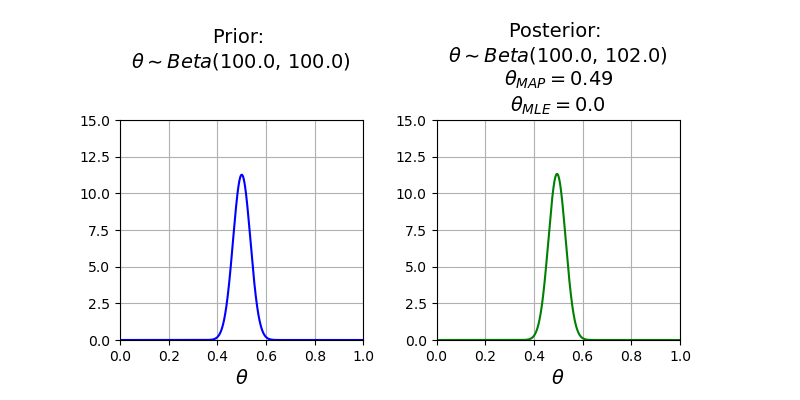

interactive(children=(FloatSlider(value=100.0, description='$\\beta_H$', min=1.0, step=1.0), FloatSlider(value…

In [11]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.7, 
                    hspace=0.5,
                    wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample_Bayes(beta_H, beta_T, n, checkbox0):
    # True distribution
    theta=0.4
    
    # Sample generation
    Nb = 1000
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    # MLE
    alpha_H = sum(samples[0:n])
    alpha_T = n - alpha_H
    theta_MLE = (alpha_H) / (alpha_H + alpha_T)
    
    # MAP
    theta_MAP = (alpha_H + beta_H - 1) / (alpha_H + beta_H + alpha_T + beta_T - 1)
    
    x_range     = np.linspace(0, 1, 1000)
    # Prior
    y_prior     = beta.pdf(x_range, beta_H, beta_T)
    # Posterior
    y_posterior = beta.pdf(x_range, alpha_H + beta_H, alpha_T + beta_T)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel(r'${\theta}$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 15)

    ax2.clear()
    ax2.grid()
    ax2.set_xlabel(r'${\theta}$', fontsize=14)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 15)

    ax1.plot(x_range, y_prior,     color="blue")
    ax2.plot(x_range, y_posterior, color="green")

    title1 = 'Prior: ' + '\n' + r'$\theta \sim Beta($' + str(round(beta_H,0)) + ', '  + str(round(beta_T,0)) + ') ' + '\n' + '\n'
    ax1.set_title(title1, fontsize=14)
    title2 = 'Posterior: ' + '\n' + r'$\theta \sim Beta($' + str(round(alpha_H + beta_H,0)) + ', '  + str(round(alpha_T + beta_T,0)) + ') ' + '\n' + r'$\theta_{MAP} = $' +  str(round(theta_MAP,2)) + '\n' + r'$\theta_{MLE} = $' +  str(round(theta_MLE,2))
    ax2.set_title(title2, fontsize=14)
    
    # Theta_MLE
    if checkbox0 == 1:
        ax2.plot([theta_MLE,theta_MLE], [0,30], color="r", ls='dashed')

    plt.show()
    
int_plot = interact(plot_BinSample_Bayes, 
                    beta_H = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_H$'),
                    beta_T = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_T$'),
                    n = widgets.IntSlider(value=2, min=2, max=1000, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta_{MLE}$', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try setting $\beta_{H} = \beta_{T} = 1$. What do you notice about $\theta_{\mathsf{MAP}}$ and $\theta_{\mathsf{MLE}}$ for all values of $n$?
2. Try setting the $\beta_{H}, \beta_{T}$ to some other combination. What do you notice about $\theta_{\mathsf{MAP}}$ and $\theta_{\mathsf{MLE}}$ as $n$ increases? This phenomenon is known as the <b>Washing Out of the Priors</b>.

</div>

<div class=answer>
<b>Answer:</b>
    
1. Setting $\beta_{H} = \beta_{T} = 1$ results in a uniform, agnostic, prior. In this setting everything we discern will be from our data observations and we see that $\theta_{\mathsf{MAP}} = \theta_{\mathsf{MLE}}$ for all values of $n$.
2. For other settings of $\beta_{H}, \beta_{T}$ as $n$ increases $\theta_{\mathsf{MAP}}$ tends towards $\theta_{\mathsf{MLE}}$ as our data observations begin to dominate our prior knowledge. However the rate at which this happens is governed with how strong our prior degree of belief was. For very sharply peaked priors it will take longer for the MAP estimate to converge with the MLE estimate.

</div>

### _Ex: Height & Age_

<IPython.core.display.Javascript object>


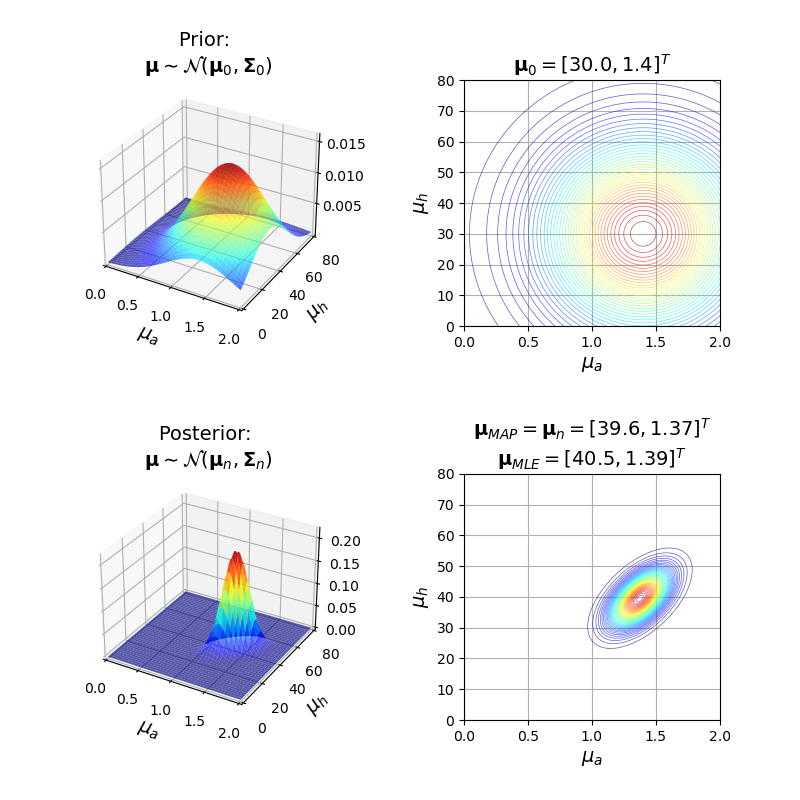

interactive(children=(FloatSlider(value=1.4, description='$\\mu_{h0}$', max=2.0, min=0.4), FloatSlider(value=3…

In [12]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.6,
                    wspace=0.5)

ax1 = fig.add_subplot(2,2,1, projection="3d")
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3, projection="3d")
ax4 = fig.add_subplot(2,2,4)

def plot_MVGSample_Bayes(mu_h_0, mu_a_0, sigma_h_0, sigma_a_0, rho_0, n, checkbox0):
    # True distribution
    mu_h_tr = 1.4 
    mu_a_tr = 34
    mu_tr = [mu_h_tr, mu_a_tr]
    sigma_h_tr = 0.5
    sigma_a_tr = 20.0
    rho_tr = 0.6
    sigma_tr = [ [sigma_h_tr**2, rho_tr*sigma_h_tr*sigma_a_tr], [rho_tr*sigma_h_tr*sigma_a_tr , sigma_a_tr**2] ]
    sigma_inv_tr = np.linalg.inv(sigma_tr)

    # Sample generation
    Nb = 5000
    np.random.seed(21)
    samples = np.random.multivariate_normal(mu_tr, sigma_tr, size=Nb)
    
    # MLE
    samples_n = samples[0:n]
    mu_MLE    = sum(samples_n)/n
    mu_h_MLE  = mu_MLE[0]
    mu_a_MLE  = mu_MLE[1]

    # Prior
    mu_0 = [mu_h_0, mu_a_0]
    sigma_0 = [ [sigma_h_0**2, rho_0*sigma_h_0*sigma_a_0], [rho_0*sigma_h_0*sigma_a_0 , sigma_a_0**2] ]
    sigma_inv_0 = np.linalg.inv(sigma_0)
    
    # Posterior
    mu_n    = np.dot(  np.linalg.inv(sigma_inv_0 + n*sigma_inv_tr),  
                           n*np.dot(sigma_inv_tr,mu_MLE) + np.dot(sigma_inv_0,mu_0)
                        )
    mu_h_n  = mu_n[0]
    mu_a_n  = mu_n[1]
    sigma_n = np.linalg.inv(sigma_inv_0 + n*sigma_inv_tr)
    
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()

    ax1.set_xlabel(r'$\mu_a$', fontsize=14)
    ax1.set_ylabel(r'$\mu_h$', fontsize=14)
    ax2.set_xlabel(r'$\mu_a$', fontsize=14)
    ax2.set_ylabel(r'$\mu_h$', fontsize=14)
    ax3.set_xlabel(r'$\mu_a$', fontsize=14)
    ax3.set_ylabel(r'$\mu_h$', fontsize=14)
    ax4.set_xlabel(r'$\mu_a$', fontsize=14)
    ax4.set_ylabel(r'$\mu_h$', fontsize=14)

    ax1.set_xlim(0, 2)
    ax1.set_ylim(0, 80)
    ax2.set_xlim(0, 2)
    ax2.set_ylim(0, 80)
    ax3.set_xlim(0, 2)
    ax3.set_ylim(0, 80)
    ax4.set_xlim(0, 2)
    ax4.set_ylim(0, 80)

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    
    x_range, y_range = np.mgrid[0:2.01:.01, 0:80.1:.1]
    pos = np.dstack((x_range, y_range))

    # Prior
    rv = multivariate_normal(mu_0, sigma_0)
    ax1.plot_surface(x_range, y_range, rv.pdf(pos), cmap=plt.cm.jet, alpha=0.65)
    ax2.contour(x_range, y_range, rv.pdf(pos), 50, cmap=plt.cm.jet, linewidths=0.5, alpha=0.65)

    # Posterior
    rv = multivariate_normal(mu_n, sigma_n)
    ax3.plot_surface(x_range, y_range, rv.pdf(pos), cmap=plt.cm.jet, alpha=0.65)
    ax4.contour(x_range, y_range, rv.pdf(pos), 50, cmap=plt.cm.jet, linewidths=0.5, alpha=0.65)
    
    title1 = 'Prior: ' + '\n' + r'$\mathbf{\mu} \sim \mathcal{N}( \mathbf{\mu}_0, \mathbf{\Sigma}_0)$'
    ax1.set_title(title1, fontsize=14)
    title2 = r'$\mathbf{\mu}_0 = [$' + str(round(mu_a_0,1)) + '$, $' + str(round(mu_h_0,2)) + '$]^T$'
    ax2.set_title(title2, fontsize=14)
    title3 = 'Posterior: ' + '\n' + r'$\mathbf{\mu} \sim \mathcal{N}( \mathbf{\mu}_n, \mathbf{\Sigma}_n)$'
    ax3.set_title(title3, fontsize=14)
    title4 = r'$\mathbf{\mu}_{MAP} = \mathbf{\mu}_n = [$' + str(round(mu_a_n,1)) + '$, $' + str(round(mu_h_n,2)) + '$]^T$' + '\n' + r'$\mathbf{\mu}_{MLE} = [$' + str(round(mu_a_MLE,1)) + '$, $' + str(round(mu_h_MLE,2)) + '$]^T$'
    ax4.set_title(title4, fontsize=14)
    
    # Plot mu_MLE
    if checkbox0 == 1:
        ax4.plot([mu_h_MLE], [mu_a_MLE], color="r", marker="o")

    plt.show()
    
int_plot = interact(plot_MVGSample_Bayes, 
                    mu_h_0    = widgets.FloatSlider(value=1.4, min=0.4, max=2, step=0.1, 
                                                    description = r'$\mu_{h0}$'),
                    mu_a_0    = widgets.FloatSlider(value=30, min=20, max=40, step=1, 
                                                    description = r'$\mu_{a0}$'),
                    sigma_h_0 = widgets.FloatSlider(value=0.5, min=0.1, max=2, step=0.1, 
                                                    description = r'$\sigma_{h0}$'),
                    sigma_a_0 = widgets.FloatSlider(value=20, min=1, max=40, step=1, 
                                                    description = r'$\sigma_{a0}$'),
                    rho_0     = widgets.FloatSlider(value=0, min=-0.9, max=0.9, step=0.1, 
                                                    description = r'$\rho_{0}$'),
                    n = widgets.IntSlider(value=10, min=10, max=1000, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'${\boldsymbol{\mu}}_{MLE}$', 
                                                 value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try setting the standard deviations of the priors very high. What do you notice about $\boldsymbol{\mu}_{\mathsf{MAP}}$ and $\boldsymbol{\mu}_{\mathsf{MLE}}$ for all values of $n$?
2. Try setting the variances to some other combination. What do you notice about $\boldsymbol{\mu}_{\mathsf{MAP}}$ and $\boldsymbol{\mu}_{\mathsf{MLE}}$ as $n$ increases?

</div>

<div class=answer>
<b>Answer:</b>
    
1. As in the 1-dimensional setting a more agnostic prior leads to a MAP estimate that is very close to the MLE estimate for all settings of $n$
2. As in the 1-dimensional setting as $n$ increases the MAP estimate tends towards the MLE estimate regardless of the location and concentration of the prior. However if the degree of prior belief is strong it will take more data for the convergence to assert itself.

</div>

<a id='section_Cred'></a>
## 2.d. Credible Intervals

The Bayesian analogue of the confidence interval is the **credible interval**. The $(1-\delta)$ credible interval is the interval from the $\frac{\delta}{2}$ percentile to the $(1-\frac{\delta}{2})$ percentile of the posterior distribution.

Now let's take a look at how the credible interval behaves for one-dimensional $\Theta$:

### _Ex: Coin Flips_

<IPython.core.display.Javascript object>


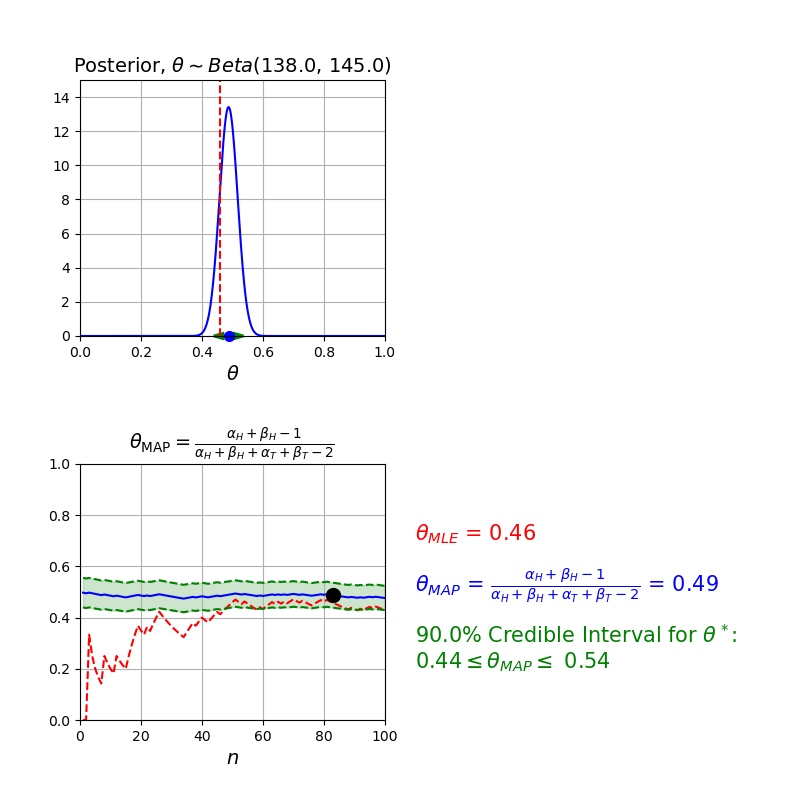

interactive(children=(FloatSlider(value=100.0, description='$\\beta_H$', min=1.0, step=1.0), FloatSlider(value…

In [5]:
plt.close('all')
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.5,
                    wspace=0.1)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

def plot_BinSample_Bayes_CI(beta_H, beta_T, delta, n, checkbox0, checkbox1):
    Nb = 100
    np.random.seed(21)
    theta = 0.4
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$n$', fontsize=14)
    ax1.set_xlim(0, Nb)
    ax1.set_ylim(0, 1)

    ax2.clear()
    ax2.set_axis_off()
    
    ax3.clear()
    ax3.grid()
    ax3.set_xlabel('$n$', fontsize=14)
    ax3.set_xlim(0, Nb)
    ax3.set_ylim(0, 1)

    ax4.clear()
    ax4.set_axis_off()

    x = np.zeros(Nb)
    theta_MAP = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    lower_bnd = np.zeros(Nb)
    upper_bnd = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        alpha_H = sum(samples[0:i+1])
        alpha_T = (i+1) - alpha_H
        theta_MAP[i] = (alpha_H + beta_H - 1)/(alpha_H + beta_H + alpha_T + beta_T - 2) 
        theta_MLE[i] = (alpha_H)/(alpha_H + alpha_T) 
        lower_bnd[i] = beta.ppf(delta/2, alpha_H+beta_H, alpha_T+beta_T)
        upper_bnd[i] = beta.ppf(1-delta/2, alpha_H+beta_H, alpha_T+beta_T)
        
    alpha_h = sum(samples[0:n])
    alpha_t = n - alpha_h
    theta_mle = (alpha_h) / (alpha_h + alpha_t)
    x_range     = np.linspace(0, 1, 1000)
    y_posterior = beta.pdf(x_range, alpha_h + beta_H, alpha_t + beta_T)
    theta_map = theta_MAP[n-1]
    ub = upper_bnd[n-1] - theta_map
    lb = theta_map - lower_bnd[n-1]
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel(r'${\theta}$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 15)
    ax1.plot(x_range, y_posterior, color='blue')    

    title1 = 'Posterior, ' + r'$\theta \sim Beta($' + str(round(alpha_h + beta_H,0)) + ', ' + str(round(alpha_t + beta_T,0)) + ')' 
    ax1.set_title(title1, fontsize=14)

    ax3.plot(x, theta_MAP, color="blue")
    if checkbox0 == 1:
        ax1.plot([theta_mle,theta_mle], [0,15], color="r", ls='dashed')
        ax3.plot(x, theta_MLE, color="r", ls='dashed')
    if checkbox1 == 1:
        point3, = ax1.plot([theta_map], [0], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b", clip_on=False)
        ax1.arrow(theta_map, 0, ub, 0, head_width=0.3, head_length=0.03, linewidth=2, color='g', 
                  length_includes_head=True, clip_on=False)
        ax1.arrow(theta_map, 0, -lb, 0, head_width=0.3, head_length=0.03, linewidth=2, color='g', 
                  length_includes_head=True, clip_on=False)
        ax3.plot(x, upper_bnd, color="g", ls='dashed')
        ax3.plot(x, lower_bnd, color="g", ls='dashed')
        ax3.fill_between(x, upper_bnd, lower_bnd, 
                     alpha=0.2, facecolor = 'g', edgecolor = 'green')
    ax3.plot([x[n-1]], [theta_MAP[n-1]], marker="o", markersize=10, 
                       markeredgecolor="black", markerfacecolor="black", clip_on=False)

    title3 = r'$\theta_{\mathsf{MAP}} = \frac{\alpha_H + \beta_H - 1}{\alpha_H + \beta_H + \alpha_T + \beta_T - 2}$'
    ax3.set_title(title3, fontsize=14)

    theta_map = theta_MAP[n-1] 
    ci = upper_bnd[n-1] - lower_bnd[n-1]
    
    ax4.text(0.0, 0.7, r'$\theta_{MLE}$ = '
             + str(round(theta_MLE[n-1],2)),
             color = 'r', fontsize = 15)
    ax4.text(0.0, 0.5, r'$\theta_{MAP}$ = '
             + r'$\frac{\alpha_H + \beta_H - 1}{\alpha_H + \beta_H + \alpha_T + \beta_T - 2}$ = '   
             + str(round(theta_MAP[n-1],2)),
             color = 'b', fontsize = 15)
    ax4.text(0.0, 0.3, str(round(100*(1-delta),0))
             + '% Credible Interval for '
             + r'$\theta^*$:', 
             color = 'g', fontsize = 15)
    ax4.text(0.0, 0.2, str(round(lower_bnd[n-1],2))
             + r'$ \leq \theta_{MAP} \leq $ '
             + str(round(upper_bnd[n-1],2))
             ,
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_BinSample_Bayes_CI, 
                    beta_H = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_H$'),
                    beta_T = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_T$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta_{MLE}$', value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot Credible Interval', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try varying $\delta$ and observe how the credible interval varies with $n$.
    
2. What do you notice about the MAP estimate and its confidence interval for very small $n$? Contrast this with the LST confidence interval.

</div>

<div class=answer>
<b>Answer:</b>
    
As $\delta$ increases the credible interval diminishes. As $n$ increases then, roughly speaking, for a given value of $\delta$, we are able to discern a tighter interval. This results varies somewhat depending on the prior distribution, however it is notable that, because of our prior knowledge, pathological effects for small $n$ do not emerge.

</div>

<a id='section_BayesComp'></a>
## 2.e. Confidence Interval v Credible Interval: Comparison 

Note that the credible interval and the confidence interval mean different things:

In the Bayesian setting $\Theta$ is a random variable so we may make the statement:

- "Given the observations, the probability that $\Theta$ is in the 90% credible interval is 90%."

But in the Frequentist setting, $\theta$ is fixed (though unknown) so it either lies in the confidence interval or it does not - probability is not relevant. Instead, before the data is observed, the interval itself is a random variable, so we may make the statement:

- "_Before the data is observed_, the probability that the interval contains the true parameter is 90%, _but after the data is observed_ nothing is random".

Let's close our study of the MLE by making a side by side comparison of the Large Sample Theory, the Bootstrap, and the PAC approached to measuring confidence, together with the Bayesian approach to measuring credibility, illustrated with the coin flipping example:

<IPython.core.display.Javascript object>


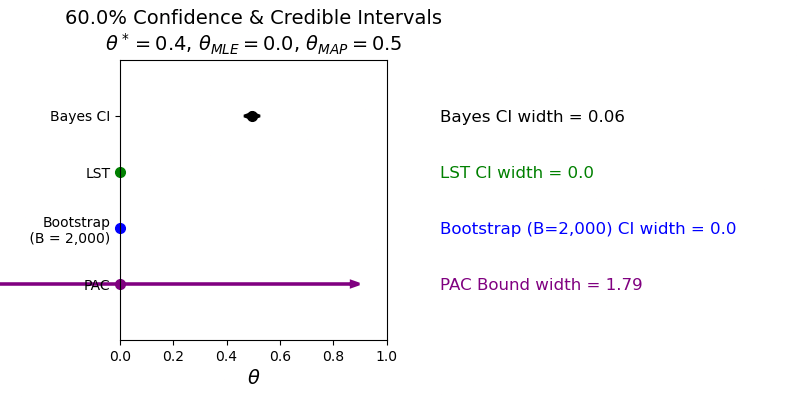

interactive(children=(FloatSlider(value=100.0, description='$\\beta_H$', min=1.0, step=1.0), FloatSlider(value…

In [14]:
plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.15,
                    bottom=0.15, 
                    right=0.85, 
                    top=0.85, 
                    hspace=0.5,
                    wspace=0.1)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_BinSample_Bayes_All(beta_H, beta_T, theta, delta, n, checkbox0):
    Nb = 100
    np.random.seed(21)
    samples = np.random.binomial(n=1, p=theta, size=Nb)
    
    B = 2000
    
    ax1.clear()
    ax1.set_xlabel(r'${\theta}$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 5)
    my_yticks = ['PAC','Bootstrap\n (B = 2,000)','LST','Bayes CI']
    ax1.set_yticks(np.array([1,2,3,4]), my_yticks)

    ax2.clear()
    ax2.set_axis_off()
    
    ax3.clear()
    ax3.grid()
    ax3.set_xlabel('$n$', fontsize=14)
    ax3.set_xlim(0, Nb)
    ax3.set_ylim(0, 1)

    ax4.clear()
    ax4.set_axis_off()

    x = np.zeros(Nb)
    theta_MLE = np.zeros(Nb)
    theta_MAP = np.zeros(Nb)
    lower_bnd_LST  = np.zeros(Nb)
    upper_bnd_LST  = np.zeros(Nb)
    lower_bnd_boot = np.zeros(Nb)
    upper_bnd_boot = np.zeros(Nb)
    lower_bnd_PAC  = np.zeros(Nb)
    upper_bnd_PAC  = np.zeros(Nb)
    lower_bnd_Cred  = np.zeros(Nb)
    upper_bnd_Cred  = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        theta_MLE[i] = sum(samples[0:i+1])/(i+1)
        # LST    
        lower_bnd_LST[i] = theta_MLE[i] + norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )
        upper_bnd_LST[i] = theta_MLE[i] - norm.ppf(delta/2) * np.sqrt( theta_MLE[i] * (1 - theta_MLE[i]) / (i+1) )
        # Bootstrap
        d = bootstrap(i+1, B, theta_MLE[i], delta)
        lower_bnd_boot[i] = theta_MLE[i] - d['q_h']
        upper_bnd_boot[i] = theta_MLE[i] - d['q_l']
        # PAC
        epsilon = np.sqrt( (1/x[i]) * np.log(2/delta) )
        lower_bnd_PAC[i] = theta_MLE[i] - epsilon
        upper_bnd_PAC[i] = theta_MLE[i] + epsilon    
        # Credible Int
        alpha_H = sum(samples[0:i+1])
        alpha_T = (i+1) - alpha_H
        theta_MAP[i] = (alpha_H + beta_H - 1)/(alpha_H + beta_H + alpha_T + beta_T - 2) 
        lower_bnd_Cred[i] = beta.ppf(delta/2, alpha_H+beta_H, alpha_T+beta_T)
        upper_bnd_Cred[i] = beta.ppf(1-delta/2, alpha_H+beta_H, alpha_T+beta_T)
        
    # Outputs for nb samples = n
    theta_mle = theta_MLE[n-1]
    theta_map = theta_MAP[n-1]
    # LST    
    lb_LST = theta_mle - lower_bnd_LST[n-1]
    ub_LST = upper_bnd_LST[n-1] - theta_mle
    # Bootstrap
    lb_boot = theta_mle - lower_bnd_boot[n-1]
    ub_boot = upper_bnd_boot[n-1] - theta_mle
    # PAC
    lb_PAC = theta_mle - lower_bnd_PAC[n-1]
    ub_PAC = upper_bnd_PAC[n-1] - theta_mle
    # Credible Int
    lb_Cred = max(theta_map - lower_bnd_Cred[n-1], 0)
    ub_Cred = min(upper_bnd_Cred[n-1] - theta_map,1)

    # Plot comparative intervals
    # LST    
    ax1.plot([theta_mle], [3], marker="o", markersize=7, markeredgecolor="g", markerfacecolor="g", clip_on=False)
    ax1.arrow(theta_mle, 3, ub_LST, 0, head_width=0.1, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 3, -lb_LST, 0, head_width=0.1, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    # Bootstrap    
    ax1.plot([theta_mle], [2], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b", clip_on=False)
    ax1.arrow(theta_mle, 2, ub_boot, 0, head_width=0.1, head_length=0.03, linewidth=2, color='b', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 2, -lb_boot, 0, head_width=0.1, head_length=0.03, linewidth=2, color='b', 
              length_includes_head=True, clip_on=False)
    # PAC    
    ax1.plot([theta_mle], [1], marker="o", markersize=7, markeredgecolor="purple", markerfacecolor="purple", clip_on=False)
    ax1.arrow(theta_mle, 1, ub_PAC, 0, head_width=0.1, head_length=0.03, linewidth=2, color='purple', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_mle, 1, -lb_PAC, 0, head_width=0.1, head_length=0.03, linewidth=2, color='purple', 
              length_includes_head=True, clip_on=False)
    title1 = str(round(100*(1-delta),0)) + '% Confidence Interval' + '\n' +r'$\theta^* = $' + str(round(theta_mle,1))
    ax1.set_title(title1, fontsize=14)

    # Credible Int    
    ax1.plot([theta_map], [4], marker="o", markersize=7, markeredgecolor="black", markerfacecolor="black", clip_on=False)
    ax1.arrow(theta_map, 4, ub_Cred, 0, head_width=0.1, head_length=0.03, linewidth=2, color='black', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(theta_map, 4, -lb_Cred, 0, head_width=0.1, head_length=0.03, linewidth=2, color='black', 
              length_includes_head=True, clip_on=False)
    title1 = str(round(100*(1-delta),0)) + '% Confidence & Credible Intervals' + '\n' +r'$\theta^* = $' + str(round(theta,1)) + ', ' + r'$\theta_{MLE} = $' + str(round(theta_mle,1)) + ', ' + r'$\theta_{MAP} = $' + str(round(theta_map,1))        
    ax1.set_title(title1, fontsize=14)

    # Text output of comparative intervals
    ax2.text(0.1, 0.78, 'Bayes CI width = '
             + str(round(ub_Cred + lb_Cred,2)),
             color = 'black', fontsize = 12)
    ax2.text(0.1, 0.58, 'LST CI width = '
             + str(round(ub_LST + lb_LST,2)),
             color = 'g', fontsize = 12)
    ax2.text(0.1, 0.38, 'Bootstrap (B=2,000) CI width = '
             + str(round(ub_boot + lb_boot,2)),
             color = 'b', fontsize = 12)
    ax2.text(0.1, 0.18, 'PAC Bound width = '
             + str(round(ub_PAC + lb_PAC,2)),
             color = 'purple', fontsize = 12)
    
    # Plot Theta^*
    if checkbox0 == 1:
        ax1.plot([theta,theta], [0,5], color="r", ls='dashed')

    plt.show()
    
int_plot = interact(plot_BinSample_Bayes_All, 
                    beta_H = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_H$'),
                    beta_T = widgets.FloatSlider(value=100, min=1, max=100, step=1, description = r'$\beta_T$'),
                    theta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = r'$\theta^*$'),
                    delta = widgets.FloatSlider(value=0.4, min=0.1, max=0.9, step=0.1, description = '$\delta$'),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot ' + r'$\theta^*$', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
As in the last exercise compare the intervals with one another. 
   
    
1. Note how the Bayes CI and the LST and Bootstrap seem to converge as $n$ increases.
2. But note how the frequentist pathologies associated with overfitting that manifest themselves for very small $n$ disappear withe Bayes CI - this is because the Bayesian setting effectively corrects for over-fitting via the prior distribution - this phenomenom is sometimes called <b>regularisation</b> and is an important concept in machine learning.

</div>